In [2]:
import cmocean.cm as cm
import copy
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import xarray as xr

from salishsea_tools import places
from salishsea_tools import visualisations as vis
from salishsea_tools import viz_tools

%matplotlib inline

In [19]:
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
bathy = nc.Dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc')
tmask = mesh['tmask']
deptht = mesh['gdept_1d'][0]

In [4]:
isent, jsent = places.PLACES['Sentry Shoal']['NEMO grid ji']
2500*np.array(places.PLACES['Sentry Shoal']['GEM2.5 grid ji'])
print (places.PLACES.keys())
print (isent, jsent)

dict_keys(['Campbell River', 'Cherry Point', 'Friday Harbor', 'Halfmoon Bay', 'Nanaimo', 'Neah Bay', 'New Westminster', 'Patricia Bay', 'Point Atkinson', 'Port Renfrew', 'Sandy Cove', 'Squamish', 'Victoria', 'Woodwards Landing', 'Boundary Bay', 'Calamity Point', 'Vancouver Harbour', 'Port Moody', 'Indian Arm Head', '2nd Narrows Rail Bridge', 'Tsawwassen', 'Duke Pt.', 'Horseshoe Bay', 'Departure Bay', 'Swartz Bay', 'Vancouver', 'Hope', 'British Columbia', 'Washington State', 'Pacific Ocean', 'Juan de Fuca Strait', 'Puget Sound', 'Strait of Georgia', 'Central SJDF', 'Baynes Sound', 'S3', 'QU39', 'SJDF', 'Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5', 'Cluster_6', 'Cluster_7', 'Cluster_8', 'Cluster_9', 'Central node', 'Delta BBL node', 'Delta DDL node', 'East node', 'Ballenas Islands', 'Discovery Island', 'Entrance Island', 'Race Rocks', 'Sand Heads', 'Saturna Island', 'Sisters Islet', 'Esquimalt', 'Pam Rocks', 'Halibut Bank', 'Sentry Shoal', 'Egmont', 'Comox Airport', 'S

In [5]:
iqifs, jqifs = 761, 137

In [6]:
bathymetry = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc')

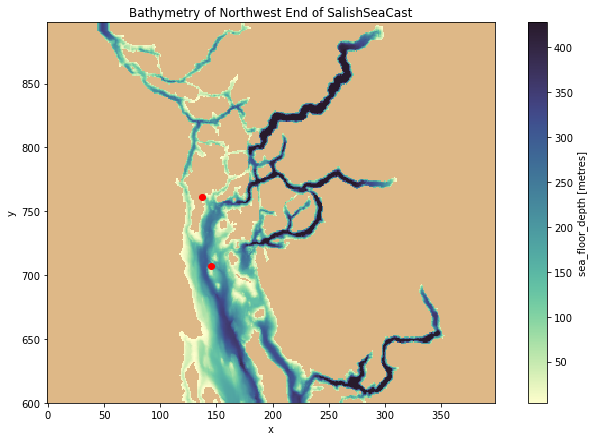

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
mycm = copy.copy(cm.deep)
mycm.set_bad('burlywood')
bathymetry.Bathymetry.plot(ax=ax, cmap=mycm);
ax.set_ylim(600, 898)
ax.plot(jsent, isent, 'ro')
ax.plot(jqifs, iqifs, 'ro')
viz_tools.set_aspect(ax);
ax.set_title('Bathymetry of Northwest End of SalishSeaCast');
fig.savefig('bathynorth.png')

-125.22055053710938 50.11656951904297 1


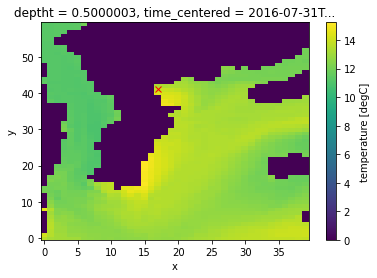

In [57]:
day = '31'
dm = xr.open_dataset(f'/results/SalishSea/nowcast-green.201812/{day}jul16/SalishSea_1d_201607{day}_201607{day}_grid_T.nc')
dm.votemper[0, 0, 720:780, 120:160].plot()
plt.plot(17, 41, 'rx')
print (bathy['nav_lon'][761, 137], bathy['nav_lat'][761, 137], tmask[0, 0, 761, 137])
iqifs, jqifs = 761, 137
dm.close()

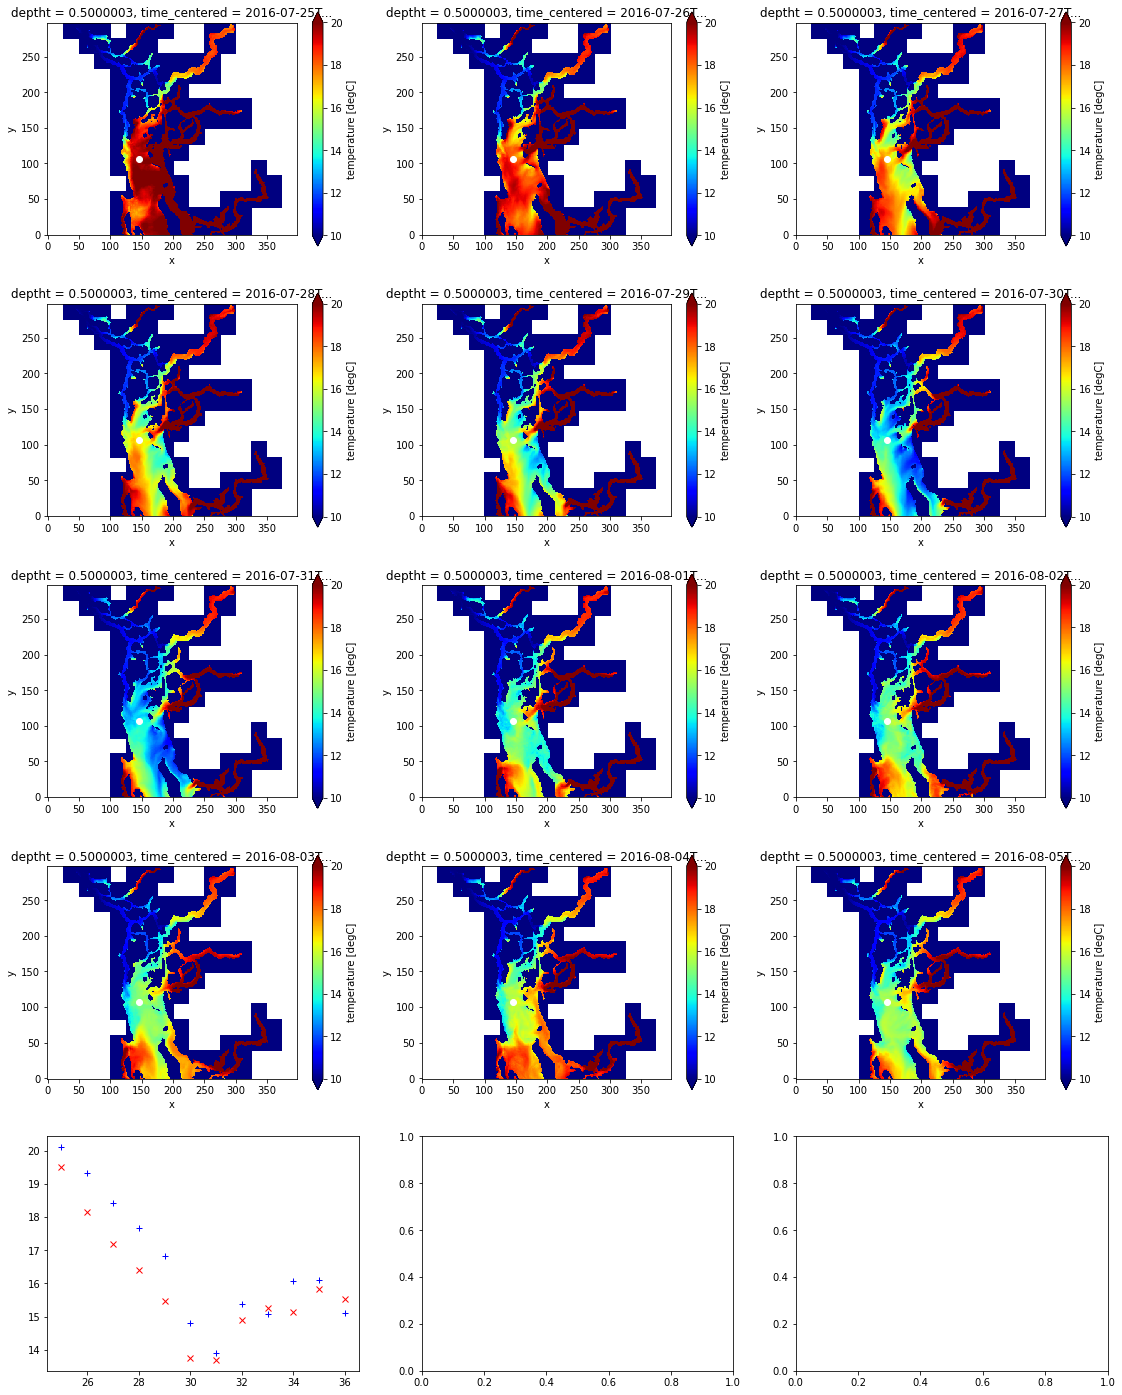

In [58]:
fig, axs = plt.subplots(5, 3, figsize=(19, 25))
icol, irow = 0, 0
for day in ['25', '26', '27', '28', '29', '30', '31']:
    dm = xr.open_dataset(f'/results/SalishSea/nowcast-green.201812/{day}jul16/SalishSea_1d_201607{day}_201607{day}_grid_T.nc')
    dm.votemper[0, 0, 600:].plot(ax = axs[irow, icol], cmap='jet', vmax=20, vmin=10)
    viz_tools.set_aspect(axs[irow, icol])
    axs[irow,icol].plot(jsent, isent-600, 'wo')
    axs[4, 0].plot(int(day), dm.votemper[0, 0, isent, jsent], 'rx')
    axs[4, 0].plot(int(day), dm.votemper[0, 0, iqifs, jqifs], 'b+')
    dm.close()
    icol = icol + 1
    if icol == 3:
        irow = irow + 1
        icol = 0
for day in ['01', '02', '03', '04', '05']:
    dm = xr.open_dataset(f'/results/SalishSea/nowcast-green.201812/{day}aug16/SalishSea_1d_201608{day}_201608{day}_grid_T.nc')
    dm.votemper[0, 0, 600:].plot(ax = axs[irow, icol], cmap='jet', vmax=20, vmin=10)
    viz_tools.set_aspect(axs[irow, icol])
    axs[irow,icol].plot(jsent, isent-600, 'wo')
    axs[4, 0].plot(int(day)+31, dm.votemper[0, 0, isent, jsent], 'rx')
    axs[4, 0].plot(int(day)+31, dm.votemper[0, 0, iqifs, jqifs], 'b+')
    dm.close()
    icol = icol + 1
    if icol == 3:
        irow = irow + 1
        icol = 0

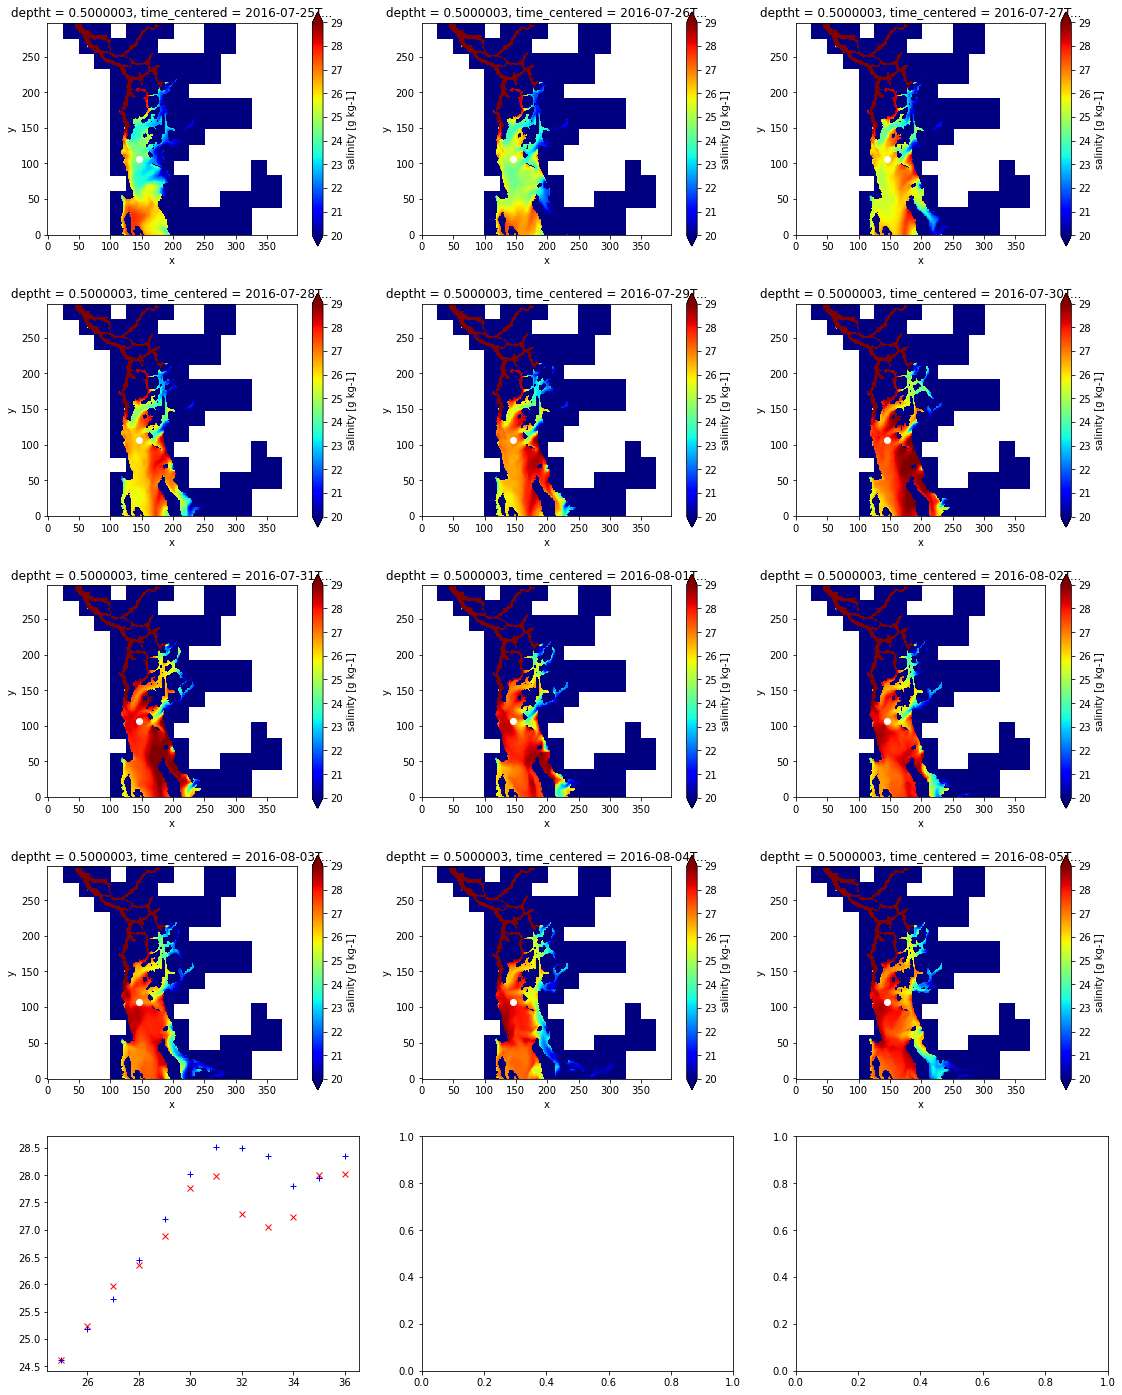

In [60]:
fig, axs = plt.subplots(5, 3, figsize=(19, 25))
icol, irow = 0, 0
for day in ['25', '26', '27', '28', '29', '30', '31']:
    dm = xr.open_dataset(f'/results/SalishSea/nowcast-green.201812/{day}jul16/SalishSea_1d_201607{day}_201607{day}_grid_T.nc')
    dm.vosaline[0, 0, 600:].plot(ax = axs[irow, icol], cmap='jet', vmax=29, vmin=20)
    viz_tools.set_aspect(axs[irow, icol])
    axs[irow,icol].plot(jsent, isent-600, 'wo')
    axs[4, 0].plot(int(day), dm.vosaline[0, 0, isent, jsent], 'rx')
    axs[4, 0].plot(int(day), dm.vosaline[0, 0, iqifs, jqifs], 'b+')
    dm.close()
    icol = icol + 1
    if icol == 3:
        irow = irow + 1
        icol = 0
for day in ['01', '02', '03', '04', '05']:
    dm = xr.open_dataset(f'/results/SalishSea/nowcast-green.201812/{day}aug16/SalishSea_1d_201608{day}_201608{day}_grid_T.nc')
    dm.vosaline[0, 0, 600:].plot(ax = axs[irow, icol], cmap='jet', vmax=29, vmin=20)
    viz_tools.set_aspect(axs[irow, icol])
    axs[irow,icol].plot(jsent, isent-600, 'wo')
    axs[4, 0].plot(int(day)+31, dm.vosaline[0, 0, isent, jsent], 'rx')
    axs[4, 0].plot(int(day)+31, dm.vosaline[0, 0, iqifs, jqifs], 'b+')
    dm.close()
    icol = icol + 1
    if icol == 3:
        irow = irow + 1
        icol = 0

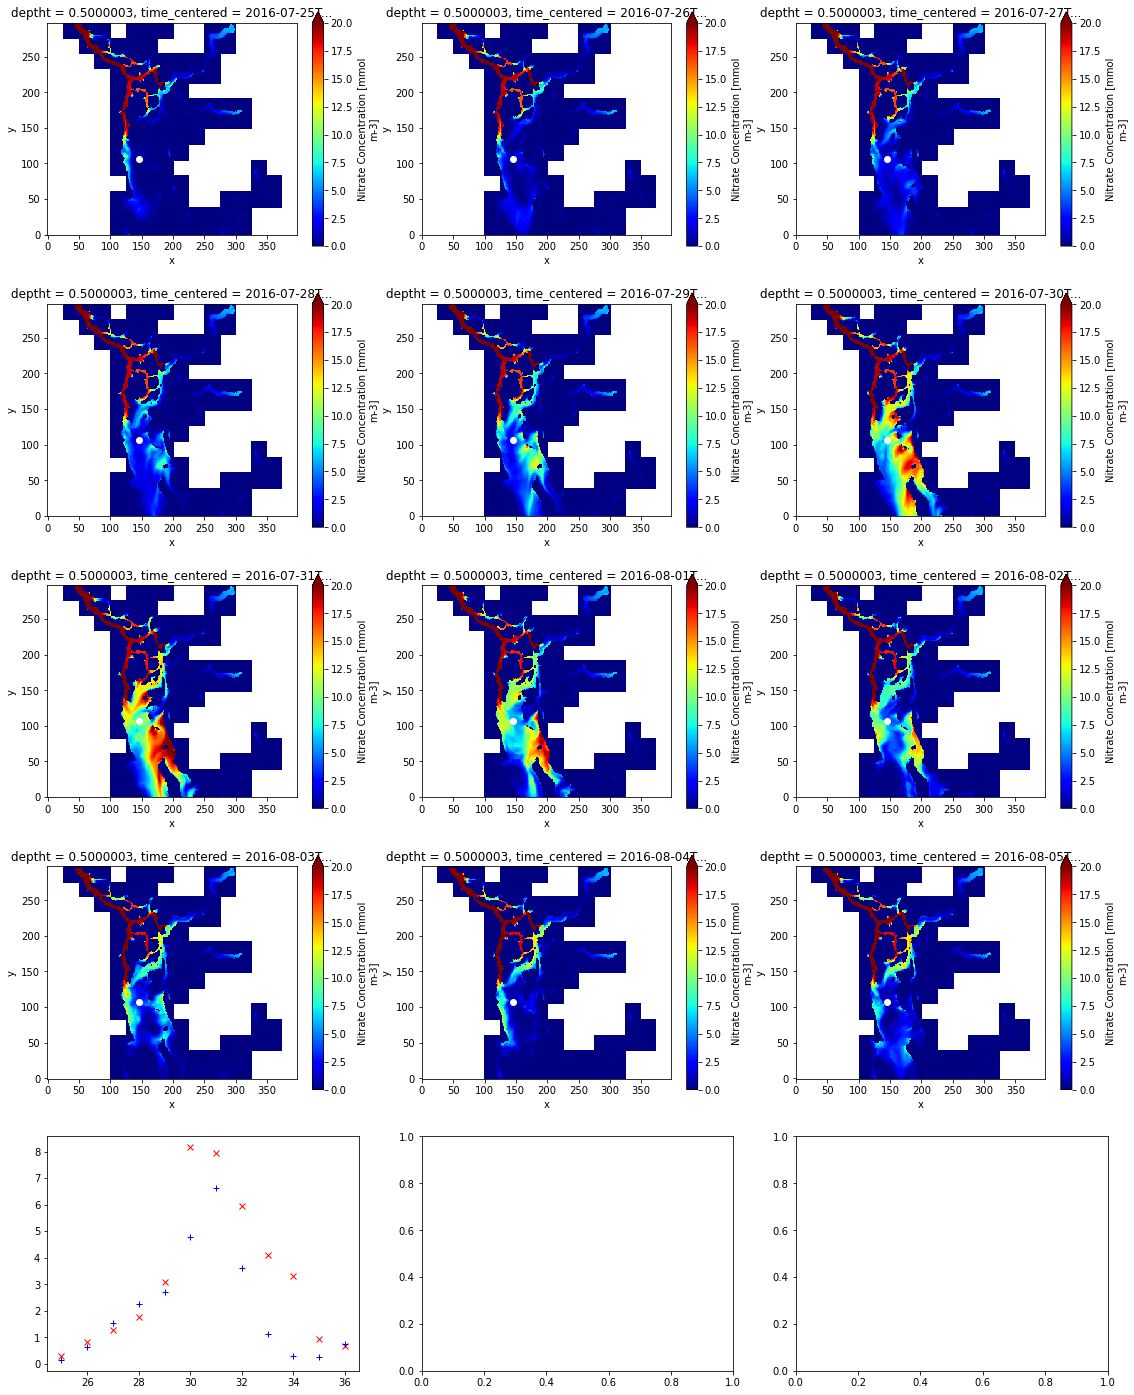

In [63]:
fig, axs = plt.subplots(5, 3, figsize=(19, 25))
icol, irow = 0, 0
for day in ['25', '26', '27', '28', '29', '30', '31']:
    dm = xr.open_dataset(f'/results/SalishSea/nowcast-green.201812/{day}jul16/SalishSea_1d_201607{day}_201607{day}_ptrc_T.nc')
    dm.nitrate[0, 0, 600:].plot(ax = axs[irow, icol], cmap='jet', vmax=20, vmin=0)
    viz_tools.set_aspect(axs[irow, icol])
    axs[irow,icol].plot(jsent, isent-600, 'wo')
    axs[4, 0].plot(int(day), dm.nitrate[0, 0, isent, jsent], 'rx')
    axs[4, 0].plot(int(day), dm.nitrate[0, 0, iqifs, jqifs], 'b+')
    dm.close()
    icol = icol + 1
    if icol == 3:
        irow = irow + 1
        icol = 0
for day in ['01', '02', '03', '04', '05']:
    dm = xr.open_dataset(f'/results/SalishSea/nowcast-green.201812/{day}aug16/SalishSea_1d_201608{day}_201608{day}_ptrc_T.nc')
    dm.nitrate[0, 0, 600:].plot(ax = axs[irow, icol], cmap='jet', vmax=20, vmin=0)
    viz_tools.set_aspect(axs[irow, icol])
    axs[irow,icol].plot(jsent, isent-600, 'wo')
    axs[4, 0].plot(int(day)+31, dm.nitrate[0, 0, isent, jsent], 'rx')
    axs[4, 0].plot(int(day)+31, dm.nitrate[0, 0, iqifs, jqifs], 'b+')
    dm.close()
    icol = icol + 1
    if icol == 3:
        irow = irow + 1
        icol = 0

In [10]:
iis = np.zeros((imax-imin, jmax-jmin))
for j in range(jmax-jmin):
    iis[0:, j] = np.arange(imin, imax)

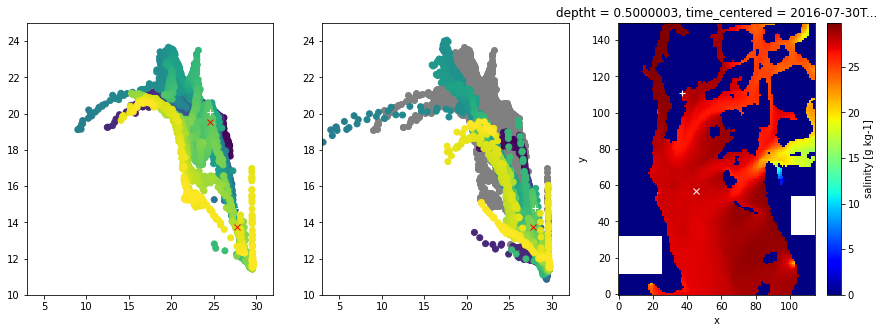

In [11]:
imin, imax = 650, 800
jmin, jmax = 100, 215
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
day = '25'
dm = xr.open_dataset(f'/results/SalishSea/nowcast-green.201812/{day}jul16/SalishSea_1d_201607{day}_201607{day}_grid_T.nc')
axs[0].scatter(dm.vosaline[0, 0, imin:imax, jmin:jmax],dm.votemper[0, 0, imin:imax, jmin:jmax], c=iis);
axs[1].scatter(dm.vosaline[0, 0, imin:imax, jmin:jmax],dm.votemper[0, 0, imin:imax, jmin:jmax], c='gray');
axs[0].plot(dm.vosaline[0, 0, isent, jsent],dm.votemper[0, 0, isent, jsent], 'rx')
axs[0].plot(dm.vosaline[0, 0, iqifs, jqifs],dm.votemper[0, 0, iqifs, jqifs], 'w+')
dm.close()


day = '30'
dm = xr.open_dataset(f'/results/SalishSea/nowcast-green.201812/{day}jul16/SalishSea_1d_201607{day}_201607{day}_grid_T.nc')
axs[1].scatter(dm.vosaline[0, 0, imin:imax, jmin:jmax],dm.votemper[0, 0, imin:imax, jmin:jmax], c=iis);
axs[1].plot(dm.vosaline[0, 0, isent, jsent],dm.votemper[0, 0, isent, jsent], 'rx')
axs[1].plot(dm.vosaline[0, 0, iqifs, jqifs],dm.votemper[0, 0, iqifs, jqifs], 'w+')
axs[0].plot(dm.vosaline[0, 0, isent, jsent],dm.votemper[0, 0, isent, jsent], 'rx')
axs[0].plot(dm.vosaline[0, 0, iqifs, jqifs],dm.votemper[0, 0, iqifs, jqifs], 'w+')
dm.vosaline[0, 0, imin:imax, jmin:jmax].plot(ax=axs[2], cmap='jet')
axs[2].plot(jsent-jmin, isent-imin, 'wx')
axs[2].plot(jqifs-jmin, iqifs-imin, 'w+')
dm.close()

for ax in axs[:2]:
    ax.set_xlim(3, 32)
    ax.set_ylim(10, 25)
    


In [12]:
day = 30
dm = xr.open_dataset(f'/results/SalishSea/nowcast-green.201812/{day}jul16/SalishSea_1d_201607{day}_201607{day}_grid_T.nc')
print (dm.vosaline[0, 0, isent, jsent].values,dm.votemper[0, 0, isent, jsent].values)
dm = xr.open_dataset(f'/results/SalishSea/nowcast-green.201812/{day}jul16/SalishSea_1d_201607{day}_201607{day}_ptrc_T.nc')
print (dm.nitrate[0, 0, isent, jsent].values)


27.762714385986328 13.766657829284668
8.16469955444336


In [298]:
def dotheplots_d(day, kd, ex, ey, hr=0):
    fig, axs = plt.subplots(3, 3, figsize=(18, 18))
    bathymetry.Bathymetry.plot(ax=axs[0, 0], cmap=mycm);
    axs[0, 0].set_ylim(imin, imax)
    axs[0, 0].set_xlim(jmin, jmax)
    bathymetry.Bathymetry.plot(ax=axs[2, 0], cmap=mycm);
    axs[2, 0].set_ylim(imin, imax)
    axs[2, 0].set_xlim(jmin, jmax)
    tepmin, tepmax = 13.2, 14.2
    dm = xr.open_dataset(f'/results/SalishSea/nowcast-green.201812/{day}jul16/SalishSea_1d_201607{day}_201607{day}_grid_T.nc')

    myarray = np.ma.array(dm.votemper[hr, kd, imin:imax, jmin:jmax], 
                      mask= (dm.votemper[hr, kd, imin:imax, jmin:jmax] > tepmax) | (dm.votemper[hr, kd, imin:imax, jmin:jmax] < tepmin))
    colours = axs[0, 1].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.thermal)
    fig.colorbar(colours, ax=axs[0, 1])

    salmin, salmax= 27.5, 28
    myarray = np.ma.array(dm.vosaline[hr, kd, imin:imax, jmin:jmax], 
                      mask= (dm.vosaline[hr, kd, imin:imax, jmin:jmax] > salmax) | (dm.vosaline[hr, kd, imin:imax, jmin:jmax] < salmin))
    colours = axs[0, 2].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.haline)
    fig.colorbar(colours, ax=axs[0, 2])

    nitmin, nitmax = 6, 10
    ds = xr.open_dataset(f'/results/SalishSea/nowcast-green.201812/{day}jul16/SalishSea_1d_201607{day}_201607{day}_ptrc_T.nc')
    myarray = np.ma.array(ds.nitrate[hr, kd, imin:imax, jmin:jmax], 
                      mask= ds.nitrate[hr, kd, imin:imax, jmin:jmax] < nitmin)
    colours = axs[1, 0].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.rain)
    fig.colorbar(colours, ax=axs[1, 0])

    myarray = np.ma.array(np.ones((imax-imin, jmax-jmin)), 
                      mask= (dm.votemper[hr, kd, imin:imax, jmin:jmax] > tepmax) | (dm.votemper[hr, kd, imin:imax, jmin:jmax] < tepmin)
                     | (dm.vosaline[hr, kd, imin:imax, jmin:jmax] > salmax) | (dm.vosaline[hr, kd, imin:imax, jmin:jmax] < salmin)
                #   | (ds.nitrate[0, kd, imin:imax, jmin:jmax] > nitmax) 
                          | (ds.nitrate[hr, kd, imin:imax, jmin:jmax] < nitmin))
    myarray.mask = myarray.mask | (1 - mesh.tmask[0, kd, imin:imax, jmin:jmax])
    colours = axs[1, 1].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.dense)
    fig.colorbar(colours, ax=axs[1, 1])

    kdd =15
    mybarray = np.ma.array((mesh.e3t_0[0, 0:kdd, imin:imax, jmin:jmax]), 
                      mask= (dm.votemper[hr, 0:kdd, imin:imax, jmin:jmax] > tepmax) | (dm.votemper[hr, 0:kdd, imin:imax, jmin:jmax] < tepmin)
                     | (dm.vosaline[hr, 0:kdd, imin:imax, jmin:jmax] > salmax) | (dm.vosaline[hr, 0:kdd, imin:imax, jmin:jmax] < salmin)
                 #  | (ds.nitrate[0, 0:kdd, imin:imax, jmin:jmax] > nitmax) 
                           | (ds.nitrate[hr, 0:kdd, imin:imax, jmin:jmax] < nitmin)
                       )
    mybarray.mask = mybarray.mask | (1 - mesh.tmask[0, 0:kdd, imin:imax, jmin:jmax])

    myarrayt = mybarray.sum(axis=0)
    colours = axs[1, 2].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarrayt, cmap='plasma')
    fig.colorbar(colours, ax=axs[1, 2])


    for ax in axs[0]:
        ax.plot(jsent+0.5, isent+0.5, 'ro')
        ax.plot(ex+0.5, ey+0.5, 'mo')
        viz_tools.set_aspect(ax)
    for ax in axs[1]:
        ax.plot(jsent+0.5, isent+0.5, 'ro')
        ax.plot(ex+0.5, ey+0.5, 'mo')
        viz_tools.set_aspect(ax)

    axs[0, 0].set_title('Bathymetry')
    axs[0, 1].set_title(f'Temperature at {kd} m (conservative $^o$C)')
    axs[0, 2].set_title(f'Salinity at {kd} m (g/kg)')
    axs[1, 0].set_title(f'Nitrate at {kd} m (uM)')
    axs[1, 1].set_title(f'Intersection of all three Ranges at {kd} m');
    axs[1, 2].set_title('Thickness of intersection of all three Ranges (m)');
    
    axs[2, 0].plot([jmin, jmax], [ey+0.5, ey+0.5],  'r-')
    axs[2, 0].plot([ex+0.5, ex+0.5], [imin, imax],  'g-')
    axs[2, 1].pcolormesh(np.arange(jmin, jmax), np.arange(15), mybarray[:, ey-imin, :])
    axs[2, 1].plot(jsent+0.5, 0+0.5, 'r*');
    axs[2, 2].pcolormesh(np.arange(imin, imax), np.arange(15), mybarray[:, :, ex-jmin])
    axs[2, 2].plot(isent+0.5, 0+0.5, 'r*');
    axs[2, 1].plot(ex+0.5, ez+0.5, 'mo')
    axs[2, 2].plot(ey+0.5, ez+0.5, 'mo');
    

    fig.savefig('exampleplot2.png')
    return mybarray, myarray

In [186]:
def dotheplots(day, kd, hr):
    fig, axs = plt.subplots(2, 3, figsize=(18, 12))
    bathymetry.Bathymetry.plot(ax=axs[0, 0], cmap=mycm);
    axs[0, 0].set_ylim(imin, imax)
    axs[0, 0].set_xlim(jmin, jmax)
    tepmin, tepmax = 13.2, 14.2
    dm = xr.open_dataset(f'/results/SalishSea/nowcast-green.201812/{day}jul16/SalishSea_1h_201607{day}_201607{day}_grid_T.nc')

    myarray = np.ma.array(dm.votemper[hr, kd, imin:imax, jmin:jmax], 
                      mask= (dm.votemper[hr, kd, imin:imax, jmin:jmax] > tepmax) | (dm.votemper[hr, kd, imin:imax, jmin:jmax] < tepmin))
    colours = axs[0, 1].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.thermal)
    fig.colorbar(colours, ax=axs[0, 1])

    salmin, salmax= 27.5, 28
    myarray = np.ma.array(dm.vosaline[hr, kd, imin:imax, jmin:jmax], 
                      mask= (dm.vosaline[hr, kd, imin:imax, jmin:jmax] > salmax) | (dm.vosaline[hr, kd, imin:imax, jmin:jmax] < salmin))
    colours = axs[0, 2].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.haline)
    fig.colorbar(colours, ax=axs[0, 2])

    nitmin, nitmax = 6, 10
    ds = xr.open_dataset(f'/results/SalishSea/nowcast-green.201812/{day}jul16/SalishSea_1h_201607{day}_201607{day}_ptrc_T.nc')
    myarray = np.ma.array(ds.nitrate[hr, kd, imin:imax, jmin:jmax], 
                      mask= (ds.nitrate[hr, kd, imin:imax, jmin:jmax] < nitmin))
    colours = axs[1, 0].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.rain)
    fig.colorbar(colours, ax=axs[1, 0])

    myarray = np.ma.array(mesh.e3t_0[0, kd, imin:imax, jmin:jmax], 
                      mask= (dm.votemper[hr, kd, imin:imax, jmin:jmax] > tepmax) | (dm.votemper[hr, kd, imin:imax, jmin:jmax] < tepmin)
                     | (dm.vosaline[hr, kd, imin:imax, jmin:jmax] > salmax) | (dm.vosaline[hr, kd, imin:imax, jmin:jmax] < salmin)
                #   | (ds.nitrate[0, kd, imin:imax, jmin:jmax] > nitmax) 
                          | (ds.nitrate[hr, kd, imin:imax, jmin:jmax] < nitmin))
    colours = axs[1, 1].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.dense)

    kdd =15
    mybarray = np.ma.array((mesh.e3t_0[0, 0:kdd, imin:imax, jmin:jmax]), 
                      mask= (dm.votemper[hr, 0:kdd, imin:imax, jmin:jmax] > tepmax) | (dm.votemper[hr, 0:kdd, imin:imax, jmin:jmax] < tepmin)
                     | (dm.vosaline[hr, 0:kdd, imin:imax, jmin:jmax] > salmax) | (dm.vosaline[hr, 0:kdd, imin:imax, jmin:jmax] < salmin)
                 #  | (ds.nitrate[0, 0:kdd, imin:imax, jmin:jmax] > nitmax) 
                           | (ds.nitrate[hr, 0:kdd, imin:imax, jmin:jmax] < nitmin)
                       )
    mybarray.mask = mybarray.mask | (1 - mesh.tmask[0, 0:kdd, imin:imax, jmin:jmax])

    myarrayt = mybarray.sum(axis=0)
    colours = axs[1, 2].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarrayt, cmap='plasma')
    fig.colorbar(colours, ax=axs[1, 2])


    for ax in axs[0]:
        ax.plot(jsent, isent, 'ro')
        viz_tools.set_aspect(ax)
    for ax in axs[1]:
        ax.plot(jsent, isent, 'ro')
        viz_tools.set_aspect(ax)

    axs[0, 0].set_title('Bathymetry')
    axs[0, 1].set_title(f'Temperature at {kd} m (conservative $^o$C)')
    axs[0, 2].set_title(f'Salinity at {kd} m (g/kg)')
    axs[1, 0].set_title('Surface Nitrate (uM)')
    axs[1, 1].set_title('Surface Intersection of all three Ranges');
    axs[1, 2].set_title('Thickness of intersectionof all three Ranges (m)');

    fig.savefig('exampleplot2.png')
    return mybarray

<ipython-input-125-e519df7f72bf>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = axs[0, 1].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.thermal)
<ipython-input-125-e519df7f72bf>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = axs[0, 2].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.haline)
<ipython-input-125-e519df7f72bf>:24: MatplotlibDeprecationWarning: shading='flat' when X an

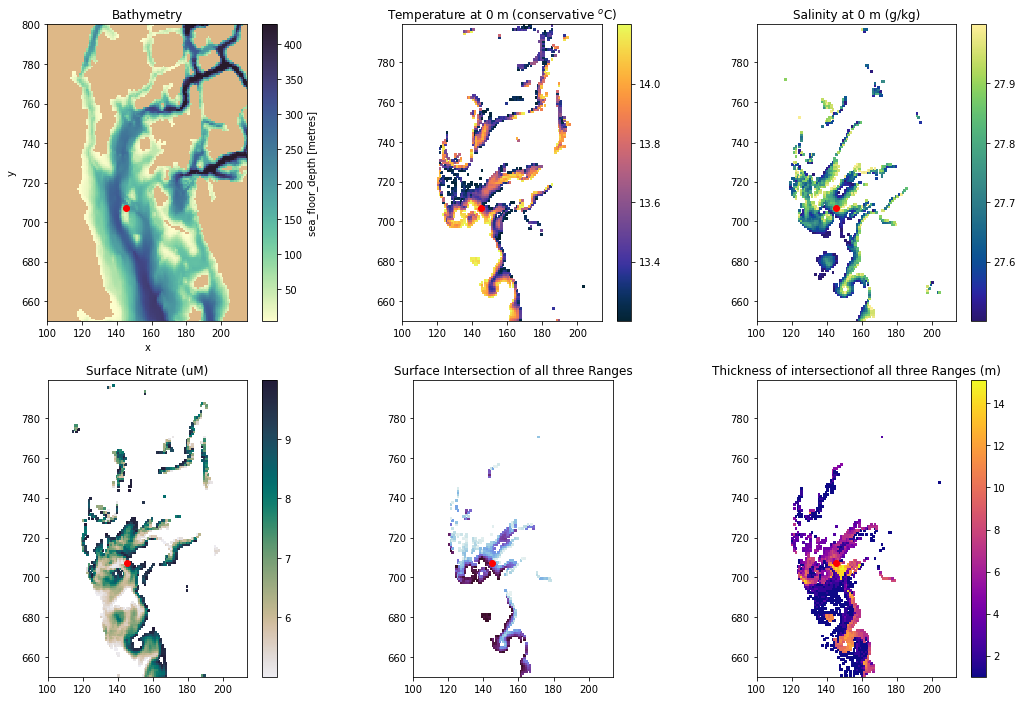

In [126]:
mybarray = dotheplots(30, 0, 12)

<ipython-input-127-eb37045dea66>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(np.arange(jmin, jmax), np.arange(15), mybarray[:, isent-imin, :])


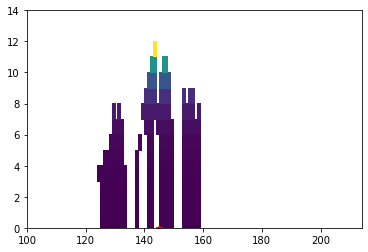

In [127]:
plt.pcolormesh(np.arange(jmin, jmax), np.arange(15), mybarray[:, isent-imin, :])
plt.plot(jsent, 0, 'r*');

<ipython-input-77-f1d53b0f4148>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = axs[0, 1].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.thermal)
<ipython-input-77-f1d53b0f4148>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = axs[0, 2].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.haline)
<ipython-input-77-f1d53b0f4148>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y

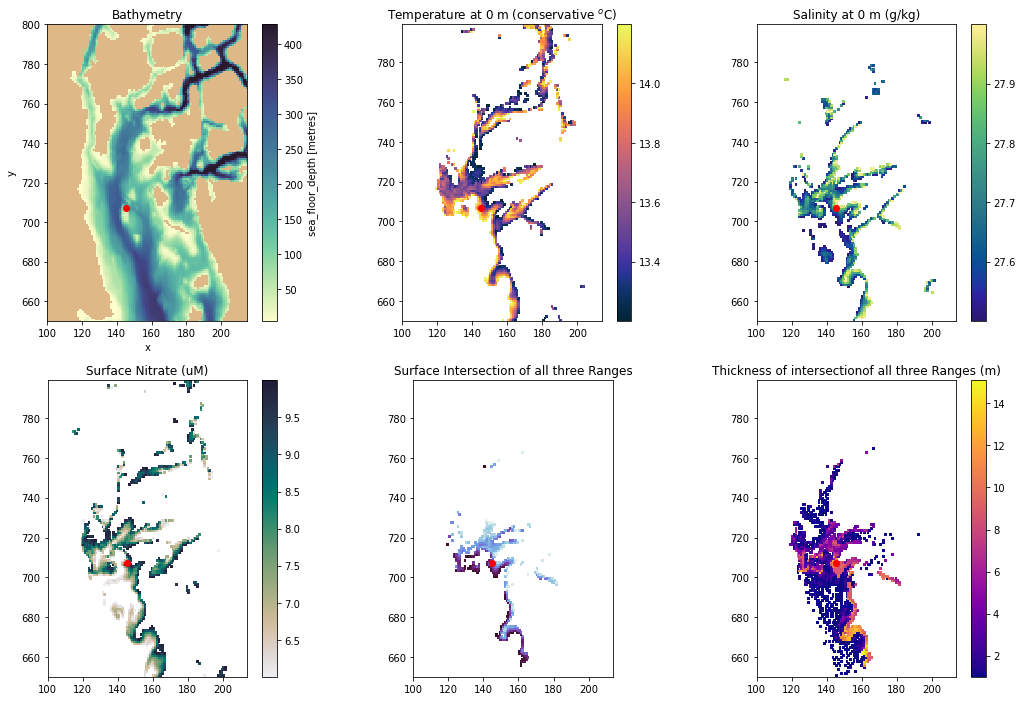

In [79]:
dotheplots(30, 0, 9)

<ipython-input-118-eb37045dea66>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(np.arange(jmin, jmax), np.arange(15), mybarray[:, isent-imin, :])


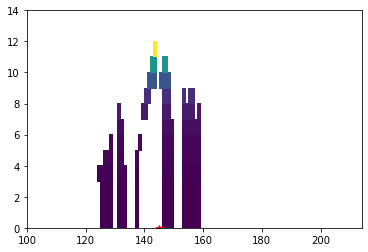

In [118]:
plt.pcolormesh(np.arange(jmin, jmax), np.arange(15), mybarray[:, isent-imin, :])
plt.plot(jsent, 0, 'r*');

<ipython-input-96-458ceaa8efac>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = axs[0, 1].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.thermal)
<ipython-input-96-458ceaa8efac>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = axs[0, 2].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.haline)
<ipython-input-96-458ceaa8efac>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y

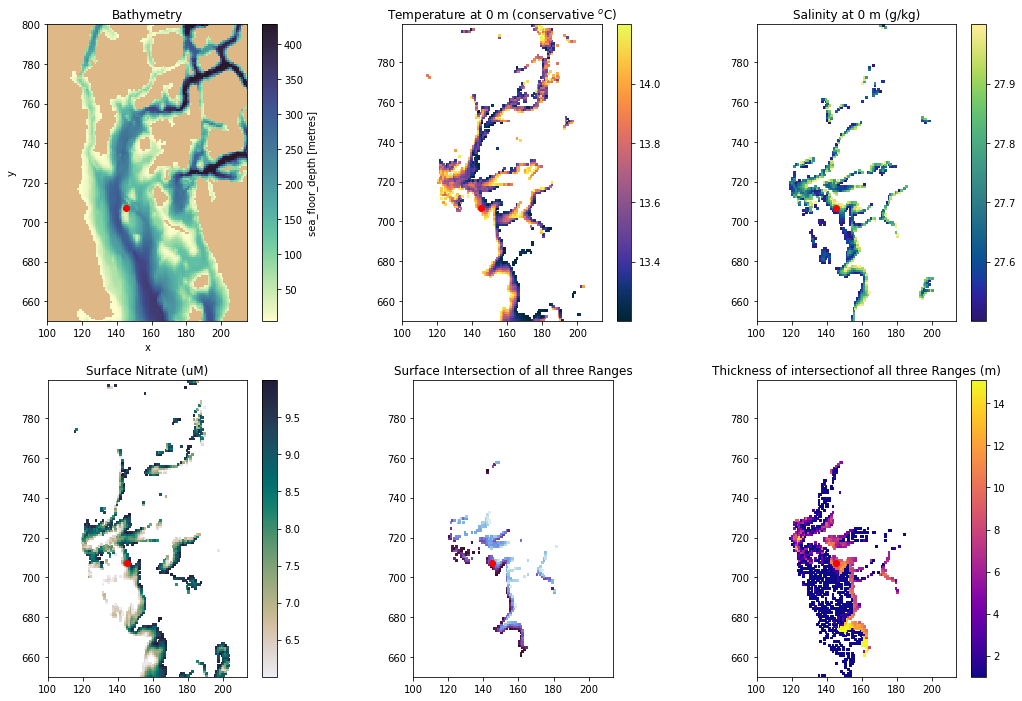

In [109]:
dotheplots(30, 0, 6)

<ipython-input-110-52f00af3ef5e>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(np.arange(jmin, jmax), np.arange(15), mybarray[:, isent-imin, :])


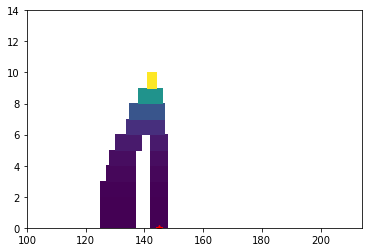

In [110]:
plt.pcolormesh(np.arange(jmin, jmax), np.arange(15), mybarray[:, isent-imin, :])
plt.plot(jsent, 0, 'r*')


<ipython-input-96-458ceaa8efac>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = axs[0, 1].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.thermal)
<ipython-input-96-458ceaa8efac>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = axs[0, 2].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.haline)
<ipython-input-96-458ceaa8efac>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y

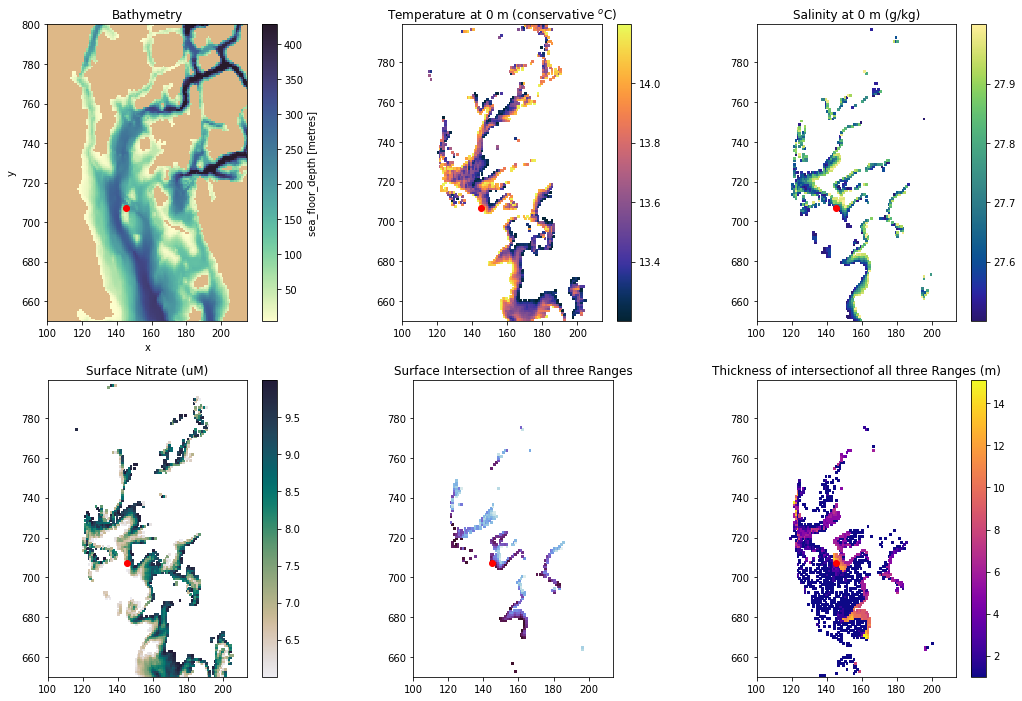

In [111]:
dotheplots(30, 0, 3)

<ipython-input-77-f1d53b0f4148>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = axs[0, 1].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.thermal)
<ipython-input-77-f1d53b0f4148>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = axs[0, 2].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.haline)
<ipython-input-77-f1d53b0f4148>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y

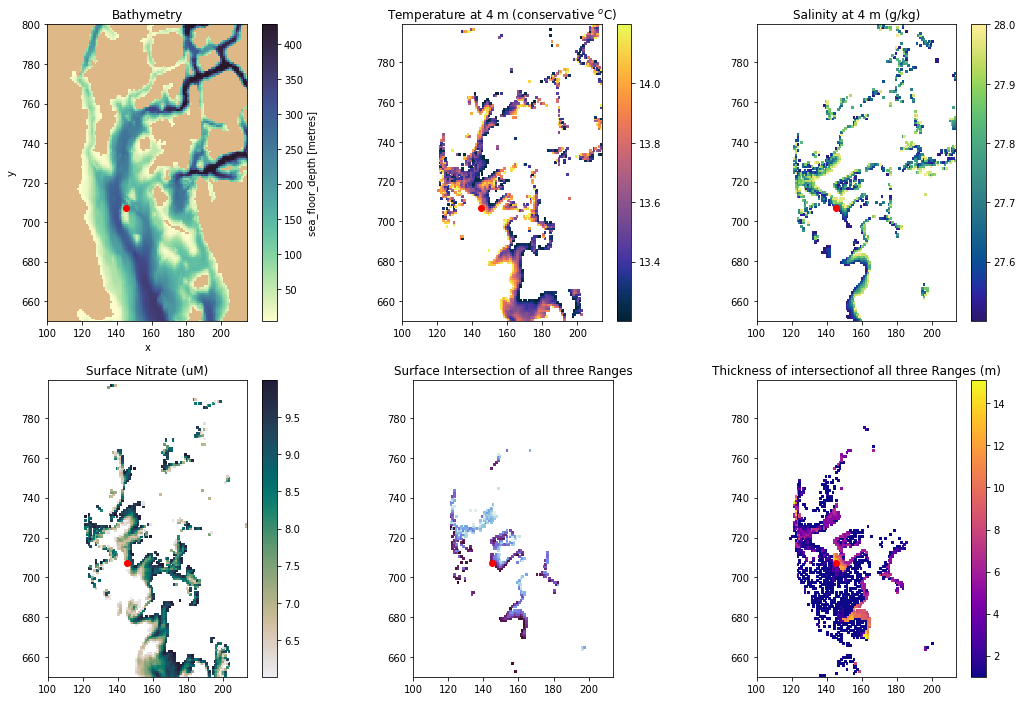

In [90]:
dotheplots(30, 4, 3)

<ipython-input-112-52f00af3ef5e>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(np.arange(jmin, jmax), np.arange(15), mybarray[:, isent-imin, :])


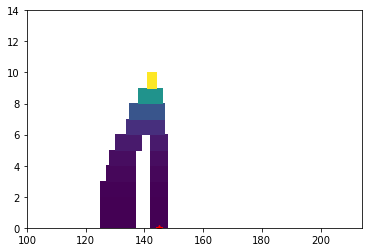

In [112]:
plt.pcolormesh(np.arange(jmin, jmax), np.arange(15), mybarray[:, isent-imin, :])
plt.plot(jsent, 0, 'r*')


<ipython-input-96-458ceaa8efac>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = axs[0, 1].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.thermal)
<ipython-input-96-458ceaa8efac>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = axs[0, 2].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.haline)
<ipython-input-96-458ceaa8efac>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y

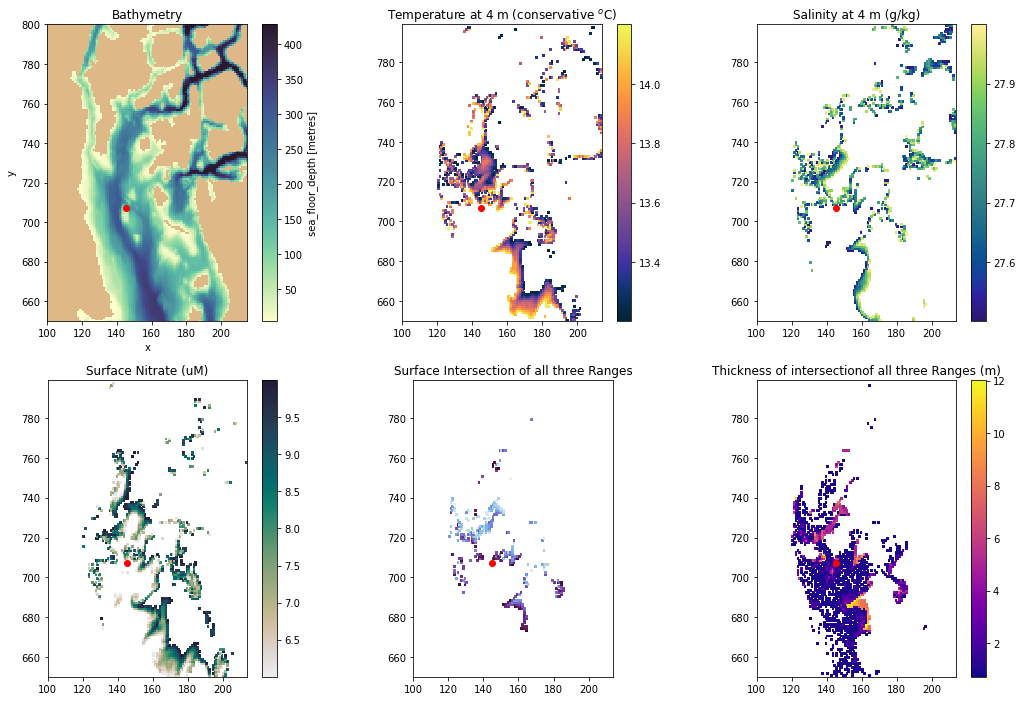

In [97]:
dotheplots(30, 4, 0)

<ipython-input-105-3c83831020be>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(np.arange(jmin, jmax), np.arange(15, 0, -1), mybarray[:, isent-imin, :])


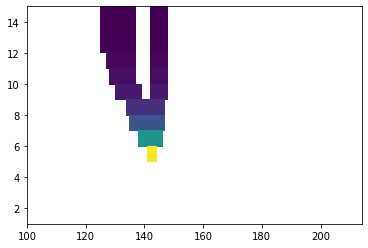

In [105]:
plt.pcolormesh(np.arange(jmin, jmax), np.arange(15, 0, -1), mybarray[:, isent-imin, :])

<ipython-input-77-f1d53b0f4148>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = axs[0, 1].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.thermal)
<ipython-input-77-f1d53b0f4148>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = axs[0, 2].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.haline)
<ipython-input-77-f1d53b0f4148>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y

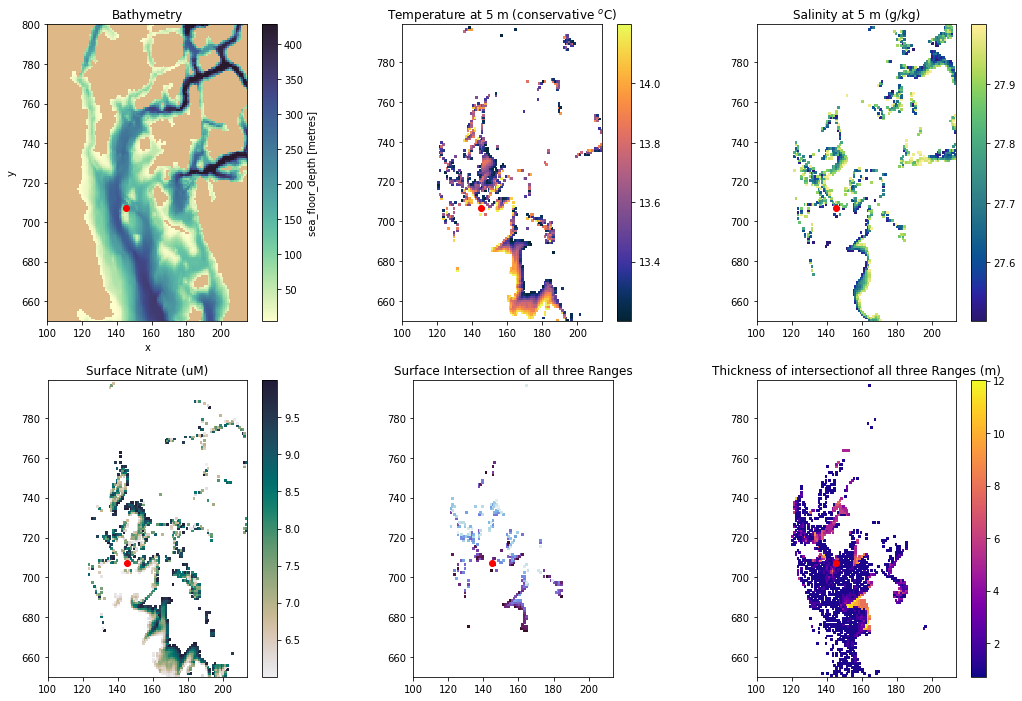

In [93]:
dotheplots(30, 5, 0)

<ipython-input-77-f1d53b0f4148>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = axs[0, 1].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.thermal)
<ipython-input-77-f1d53b0f4148>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = axs[0, 2].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.haline)
<ipython-input-77-f1d53b0f4148>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y

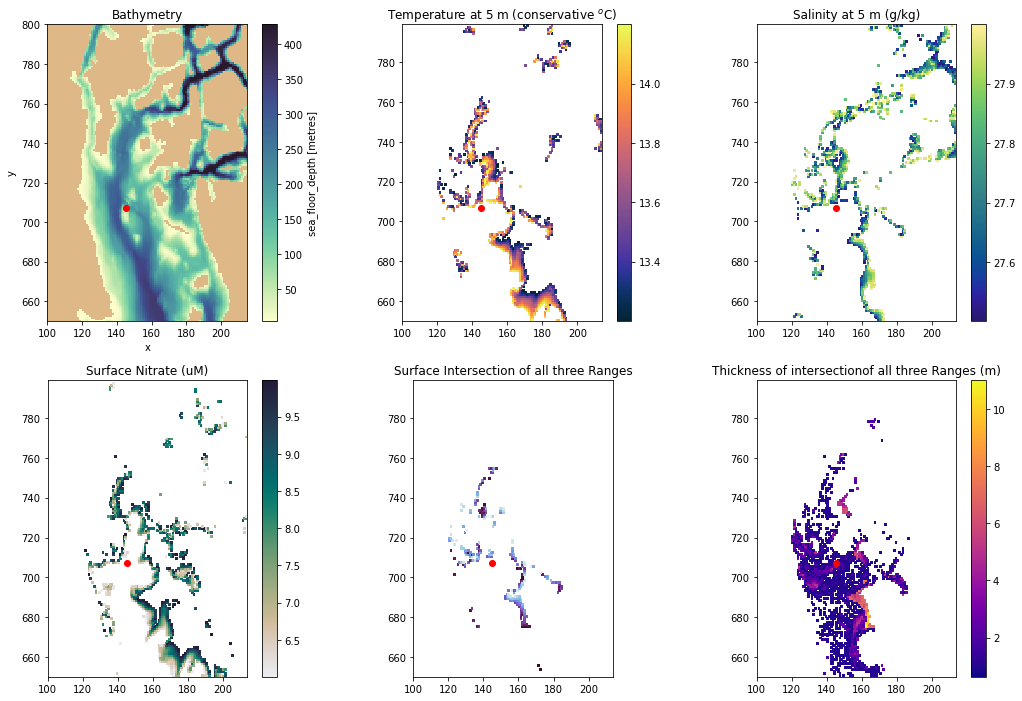

In [94]:
dotheplots(29, 5, 21)

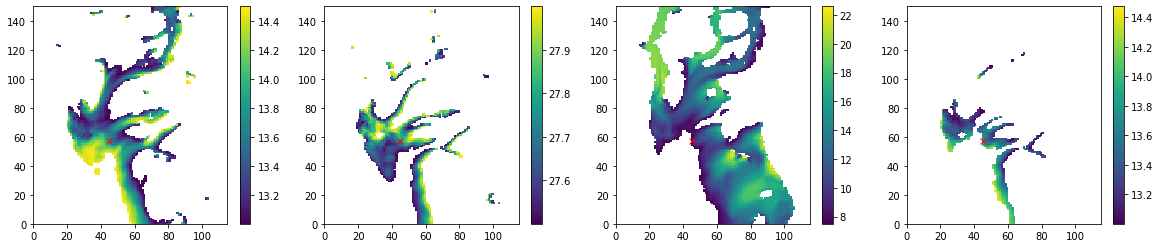

In [239]:
day = 30
kd = 0
tepmin, tepmax = 13, 14.5
dm = xr.open_dataset(f'/results/SalishSea/nowcast-green.201812/{day}jul16/SalishSea_1d_201607{day}_201607{day}_grid_T.nc')
fig, axs = plt.subplots(1, 4, figsize=(20, 4))
myarray = np.ma.array(dm.votemper[0, kd, imin:imax, jmin:jmax], 
                      mask= (dm.votemper[0, kd, imin:imax, jmin:jmax] > tepmax) | (dm.votemper[0, kd, imin:imax, jmin:jmax] < tepmin))
#dm.votemper[0, 0, imin:imax, jmin:jmax].plot(ax=axs[0], vmin=13, vmax=14)
colours = axs[0].pcolormesh(myarray)
fig.colorbar(colours, ax=axs[0])
#dm.vosaline[0, 0, imin:imax, jmin:jmax].plot(ax=axs[1], vmin=27.5, vmax=28);
myarray = np.ma.array(dm.vosaline[0, kd, imin:imax, jmin:jmax], 
                      mask= (dm.vosaline[0, kd, imin:imax, jmin:jmax] > 28) | (dm.vosaline[0, kd, imin:imax, jmin:jmax] < 27.5))
colours = axs[1].pcolormesh(myarray)
fig.colorbar(colours, ax=axs[1]);
ds = xr.open_dataset(f'/results/SalishSea/nowcast-green.201812/{day}jul16/SalishSea_1d_201607{day}_201607{day}_ptrc_T.nc')
myarray = np.ma.array(ds.nitrate[0, 0, imin:imax, jmin:jmax], 
                      mask= (ds.nitrate[0, kd, imin:imax, jmin:jmax] < 7.5))
colours = axs[2].pcolormesh(myarray)
fig.colorbar(colours, ax=axs[2])
myarray = np.ma.array(dm.votemper[0, kd, imin:imax, jmin:jmax], 
                      mask= (dm.votemper[0, kd, imin:imax, jmin:jmax] > tepmax) | (dm.votemper[0, kd, imin:imax, jmin:jmax] < tepmin)
                     | (dm.vosaline[0, kd, imin:imax, jmin:jmax] > 28) | (dm.vosaline[0, kd, imin:imax, jmin:jmax] < 27.5)
                    | (ds.nitrate[0, kd, imin:imax, jmin:jmax] < 7.5))
colours = axs[3].pcolormesh(myarray)
fig.colorbar(colours, ax=axs[3]);
for ax in axs:
    ax.plot(jsent-jmin, isent-imin, 'rx')


7608.843


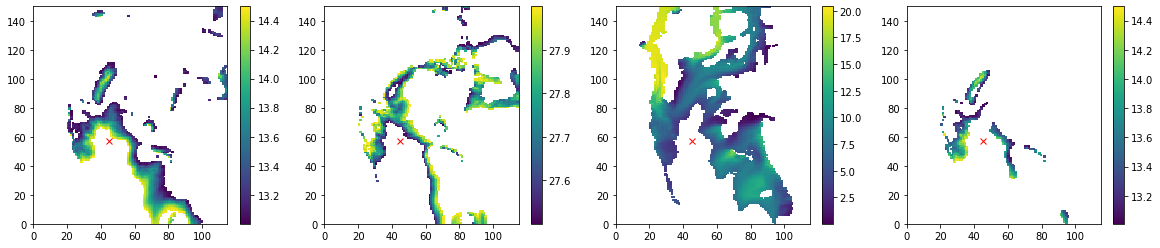

In [248]:
day = 29
kd = 5
tepmin, tepmax = 13, 14.5
dm = xr.open_dataset(f'/results/SalishSea/nowcast-green.201812/{day}jul16/SalishSea_1d_201607{day}_201607{day}_grid_T.nc')
fig, axs = plt.subplots(1, 4, figsize=(20, 4))
myarray = np.ma.array(dm.votemper[0, kd, imin:imax, jmin:jmax], 
                      mask= (dm.votemper[0, kd, imin:imax, jmin:jmax] > tepmax) | (dm.votemper[0, kd, imin:imax, jmin:jmax] < tepmin))
#dm.votemper[0, 0, imin:imax, jmin:jmax].plot(ax=axs[0], vmin=13, vmax=14)
colours = axs[0].pcolormesh(myarray)
fig.colorbar(colours, ax=axs[0])
#dm.vosaline[0, 0, imin:imax, jmin:jmax].plot(ax=axs[1], vmin=27.5, vmax=28);
myarray = np.ma.array(dm.vosaline[0, kd, imin:imax, jmin:jmax], 
                      mask= (dm.vosaline[0, kd, imin:imax, jmin:jmax] > 28) | (dm.vosaline[0, kd, imin:imax, jmin:jmax] < 27.5))
colours = axs[1].pcolormesh(myarray)
fig.colorbar(colours, ax=axs[1]);
ds = xr.open_dataset(f'/results/SalishSea/nowcast-green.201812/{day}jul16/SalishSea_1d_201607{day}_201607{day}_ptrc_T.nc')
myarray = np.ma.array(ds.nitrate[0, 0, imin:imax, jmin:jmax], 
                      mask= ds.nitrate[0, kd, imin:imax, jmin:jmax] < 7.5)
colours = axs[2].pcolormesh(myarray)
fig.colorbar(colours, ax=axs[2])
myarray = np.ma.array(dm.votemper[0, kd, imin:imax, jmin:jmax], 
                      mask= (dm.votemper[0, kd, imin:imax, jmin:jmax] > tepmax) | (dm.votemper[0, kd, imin:imax, jmin:jmax] < tepmin)
                     | (dm.vosaline[0, kd, imin:imax, jmin:jmax] > 28) | (dm.vosaline[0, kd, imin:imax, jmin:jmax] < 27.5)
                     | (ds.nitrate[0, kd, imin:imax, jmin:jmax] < 7.5))
colours = axs[3].pcolormesh(myarray)
fig.colorbar(colours, ax=axs[3]);
for ax in axs:
    ax.plot(jsent-jmin, isent-imin, 'rx')
print (np.nansum(myarray))

7241.916


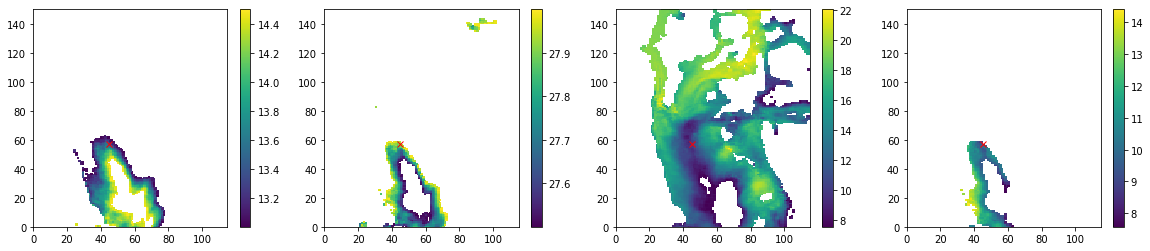

In [256]:
day = 28
kd = 9
tepmin, tepmax = 13, 14.5
dm = xr.open_dataset(f'/results/SalishSea/nowcast-green.201812/{day}jul16/SalishSea_1d_201607{day}_201607{day}_grid_T.nc')
fig, axs = plt.subplots(1, 4, figsize=(20, 4))
myarray = np.ma.array(dm.votemper[0, kd, imin:imax, jmin:jmax], 
                      mask= (dm.votemper[0, kd, imin:imax, jmin:jmax] > tepmax) | (dm.votemper[0, kd, imin:imax, jmin:jmax] < tepmin))
#dm.votemper[0, 0, imin:imax, jmin:jmax].plot(ax=axs[0], vmin=13, vmax=14)
colours = axs[0].pcolormesh(myarray)
fig.colorbar(colours, ax=axs[0])
#dm.vosaline[0, 0, imin:imax, jmin:jmax].plot(ax=axs[1], vmin=27.5, vmax=28);
myarray = np.ma.array(dm.vosaline[0, kd, imin:imax, jmin:jmax], 
                      mask= (dm.vosaline[0, kd, imin:imax, jmin:jmax] > 28) | (dm.vosaline[0, kd, imin:imax, jmin:jmax] < 27.5))
colours = axs[1].pcolormesh(myarray)
fig.colorbar(colours, ax=axs[1]);
ds = xr.open_dataset(f'/results/SalishSea/nowcast-green.201812/{day}jul16/SalishSea_1d_201607{day}_201607{day}_ptrc_T.nc')
myarray = np.ma.array(ds.nitrate[0, kd, imin:imax, jmin:jmax], 
                      mask= (ds.nitrate[0, kd, imin:imax, jmin:jmax] < 7.5))
colours = axs[2].pcolormesh(myarray)
fig.colorbar(colours, ax=axs[2])
myarray = np.ma.array(ds.nitrate[0, kd, imin:imax, jmin:jmax], 
                      mask= (dm.votemper[0, kd, imin:imax, jmin:jmax] > tepmax) | (dm.votemper[0, kd, imin:imax, jmin:jmax] < tepmin)
                     | (dm.vosaline[0, kd, imin:imax, jmin:jmax] > 28) | (dm.vosaline[0, kd, imin:imax, jmin:jmax] < 27.5)
                  #   | (ds.nitrate[0, 0, imin:imax, jmin:jmax] > 12) 
                    | (ds.nitrate[0, kd, imin:imax, jmin:jmax] < 7.5))
colours = axs[3].pcolormesh(myarray)
fig.colorbar(colours, ax=axs[3]);
for ax in axs:
    ax.plot(jsent-jmin, isent-imin, 'rx')
print (np.nansum(myarray))

10428.901


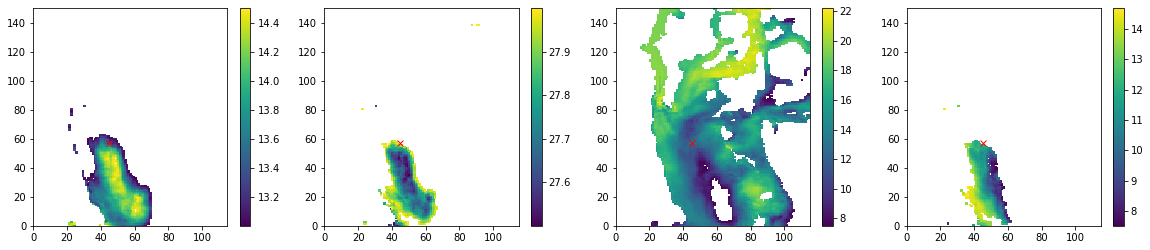

In [262]:
day = 27
kd = 10
tepmin, tepmax = 13, 14.5
dm = xr.open_dataset(f'/results/SalishSea/nowcast-green.201812/{day}jul16/SalishSea_1d_201607{day}_201607{day}_grid_T.nc')
fig, axs = plt.subplots(1, 4, figsize=(20, 4))
myarray = np.ma.array(dm.votemper[0, kd, imin:imax, jmin:jmax], 
                      mask= (dm.votemper[0, kd, imin:imax, jmin:jmax] > tepmax) | (dm.votemper[0, kd, imin:imax, jmin:jmax] < tepmin))
#dm.votemper[0, 0, imin:imax, jmin:jmax].plot(ax=axs[0], vmin=13, vmax=14)
colours = axs[0].pcolormesh(myarray)
fig.colorbar(colours, ax=axs[0])
#dm.vosaline[0, 0, imin:imax, jmin:jmax].plot(ax=axs[1], vmin=27.5, vmax=28);
myarray = np.ma.array(dm.vosaline[0, kd, imin:imax, jmin:jmax], 
                      mask= (dm.vosaline[0, kd, imin:imax, jmin:jmax] > 28) | (dm.vosaline[0, kd, imin:imax, jmin:jmax] < 27.5))
colours = axs[1].pcolormesh(myarray)
fig.colorbar(colours, ax=axs[1]);
ds = xr.open_dataset(f'/results/SalishSea/nowcast-green.201812/{day}jul16/SalishSea_1d_201607{day}_201607{day}_ptrc_T.nc')
myarray = np.ma.array(ds.nitrate[0, kd, imin:imax, jmin:jmax], 
                      mask= (ds.nitrate[0, kd, imin:imax, jmin:jmax] < 7.5))
colours = axs[2].pcolormesh(myarray)
fig.colorbar(colours, ax=axs[2])
myarray = np.ma.array(ds.nitrate[0, kd, imin:imax, jmin:jmax], 
                      mask= (dm.votemper[0, kd, imin:imax, jmin:jmax] > tepmax) | (dm.votemper[0, kd, imin:imax, jmin:jmax] < tepmin)
                     | (dm.vosaline[0, kd, imin:imax, jmin:jmax] > 28) | (dm.vosaline[0, kd, imin:imax, jmin:jmax] < 27.5)
                  #   | (ds.nitrate[0, 0, imin:imax, jmin:jmax] > 12) 
                    | (ds.nitrate[0, kd, imin:imax, jmin:jmax] < 7.5))
colours = axs[3].pcolormesh(myarray)
fig.colorbar(colours, ax=axs[3]);
for ax in axs:
    ax.plot(jsent-jmin, isent-imin, 'rx')
print (np.nansum(myarray))

9052.86


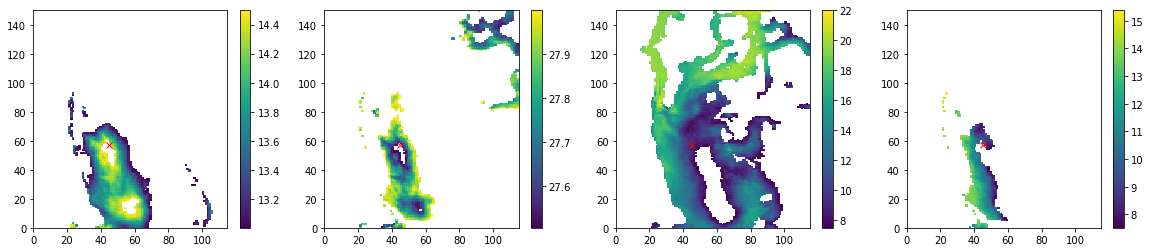

In [267]:
day = 26
kd = 9
tepmin, tepmax = 13, 14.5
dm = xr.open_dataset(f'/results/SalishSea/nowcast-green.201812/{day}jul16/SalishSea_1d_201607{day}_201607{day}_grid_T.nc')
fig, axs = plt.subplots(1, 4, figsize=(20, 4))
myarray = np.ma.array(dm.votemper[0, kd, imin:imax, jmin:jmax], 
                      mask= (dm.votemper[0, kd, imin:imax, jmin:jmax] > tepmax) | (dm.votemper[0, kd, imin:imax, jmin:jmax] < tepmin))
#dm.votemper[0, 0, imin:imax, jmin:jmax].plot(ax=axs[0], vmin=13, vmax=14)
colours = axs[0].pcolormesh(myarray)
fig.colorbar(colours, ax=axs[0])
#dm.vosaline[0, 0, imin:imax, jmin:jmax].plot(ax=axs[1], vmin=27.5, vmax=28);
myarray = np.ma.array(dm.vosaline[0, kd, imin:imax, jmin:jmax], 
                      mask= (dm.vosaline[0, kd, imin:imax, jmin:jmax] > 28) | (dm.vosaline[0, kd, imin:imax, jmin:jmax] < 27.5))
colours = axs[1].pcolormesh(myarray)
fig.colorbar(colours, ax=axs[1]);
ds = xr.open_dataset(f'/results/SalishSea/nowcast-green.201812/{day}jul16/SalishSea_1d_201607{day}_201607{day}_ptrc_T.nc')
myarray = np.ma.array(ds.nitrate[0, kd, imin:imax, jmin:jmax], 
                      mask= (ds.nitrate[0, kd, imin:imax, jmin:jmax] < 7.5))
colours = axs[2].pcolormesh(myarray)
fig.colorbar(colours, ax=axs[2])
myarray = np.ma.array(ds.nitrate[0, kd, imin:imax, jmin:jmax], 
                      mask= (dm.votemper[0, kd, imin:imax, jmin:jmax] > tepmax) | (dm.votemper[0, kd, imin:imax, jmin:jmax] < tepmin)
                     | (dm.vosaline[0, kd, imin:imax, jmin:jmax] > 28) | (dm.vosaline[0, kd, imin:imax, jmin:jmax] < 27.5)
                  #   | (ds.nitrate[0, 0, imin:imax, jmin:jmax] > 12) 
                    | (ds.nitrate[0, kd, imin:imax, jmin:jmax] < 7.5))
colours = axs[3].pcolormesh(myarray)
fig.colorbar(colours, ax=axs[3]);
for ax in axs:
    ax.plot(jsent-jmin, isent-imin, 'rx')
print (np.nansum(myarray))

6684.7275


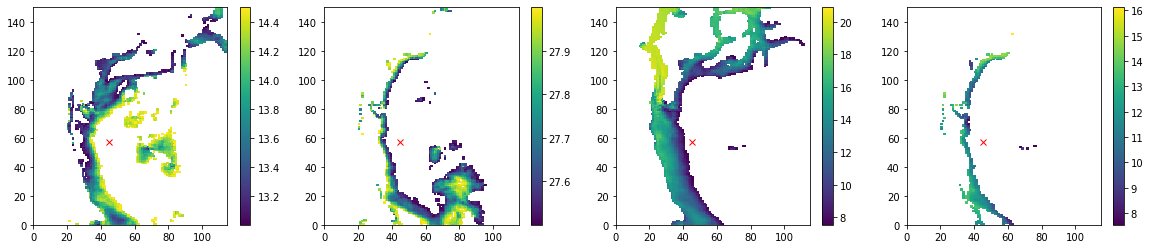

In [277]:
day = 25
kd = 6
tepmin, tepmax = 13, 14.5
dm = xr.open_dataset(f'/results/SalishSea/nowcast-green.201812/{day}jul16/SalishSea_1d_201607{day}_201607{day}_grid_T.nc')
fig, axs = plt.subplots(1, 4, figsize=(20, 4))
myarray = np.ma.array(dm.votemper[0, kd, imin:imax, jmin:jmax], 
                      mask= (dm.votemper[0, kd, imin:imax, jmin:jmax] > tepmax) | (dm.votemper[0, kd, imin:imax, jmin:jmax] < tepmin))
#dm.votemper[0, 0, imin:imax, jmin:jmax].plot(ax=axs[0], vmin=13, vmax=14)
colours = axs[0].pcolormesh(myarray)
fig.colorbar(colours, ax=axs[0])
#dm.vosaline[0, 0, imin:imax, jmin:jmax].plot(ax=axs[1], vmin=27.5, vmax=28);
myarray = np.ma.array(dm.vosaline[0, kd, imin:imax, jmin:jmax], 
                      mask= (dm.vosaline[0, kd, imin:imax, jmin:jmax] > 28) | (dm.vosaline[0, kd, imin:imax, jmin:jmax] < 27.5))
colours = axs[1].pcolormesh(myarray)
fig.colorbar(colours, ax=axs[1]);
ds = xr.open_dataset(f'/results/SalishSea/nowcast-green.201812/{day}jul16/SalishSea_1d_201607{day}_201607{day}_ptrc_T.nc')
myarray = np.ma.array(ds.nitrate[0, kd, imin:imax, jmin:jmax], 
                      mask= (ds.nitrate[0, kd, imin:imax, jmin:jmax] < 7.5))
colours = axs[2].pcolormesh(myarray)
fig.colorbar(colours, ax=axs[2])
myarray = np.ma.array(ds.nitrate[0, kd, imin:imax, jmin:jmax], 
                      mask= (dm.votemper[0, kd, imin:imax, jmin:jmax] > tepmax) | (dm.votemper[0, kd, imin:imax, jmin:jmax] < tepmin)
                     | (dm.vosaline[0, kd, imin:imax, jmin:jmax] > 28) | (dm.vosaline[0, kd, imin:imax, jmin:jmax] < 27.5)
                  #   | (ds.nitrate[0, 0, imin:imax, jmin:jmax] > 12) 
                    | (ds.nitrate[0, kd, imin:imax, jmin:jmax] < 7.5))
colours = axs[3].pcolormesh(myarray)
fig.colorbar(colours, ax=axs[3]);
for ax in axs:
    ax.plot(jsent-jmin, isent-imin, 'rx')
print (np.nansum(myarray))

<ipython-input-188-576676f3b9a5>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = axs[0, 1].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.thermal)
<ipython-input-188-576676f3b9a5>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = axs[0, 2].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.haline)
<ipython-input-188-576676f3b9a5>:24: MatplotlibDeprecationWarning: shading='flat' when X an

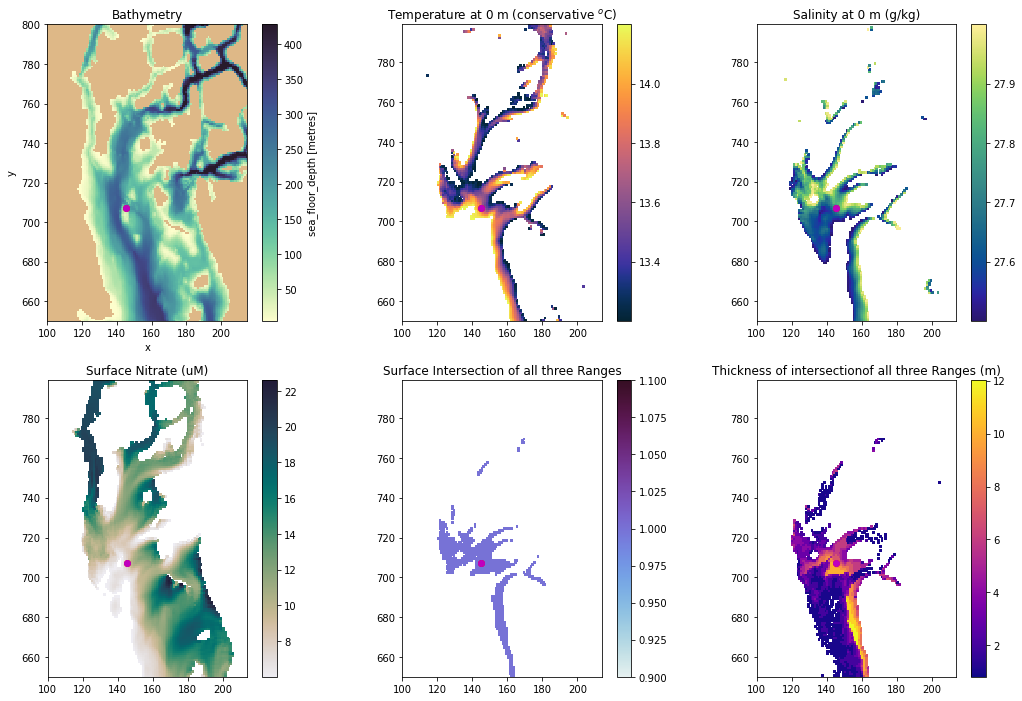

In [195]:
mybarray, myarray = dotheplots_d(30, 0, jsent, isent)

<ipython-input-196-5c122c68c801>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[0].pcolormesh(np.arange(jmin, jmax), np.arange(15), mybarray[:, isent-imin, :])
<ipython-input-196-5c122c68c801>:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[1].pcolormesh(np.arange(imin, imax), np.arange(15), mybarray[:, :, jsent-jmin])


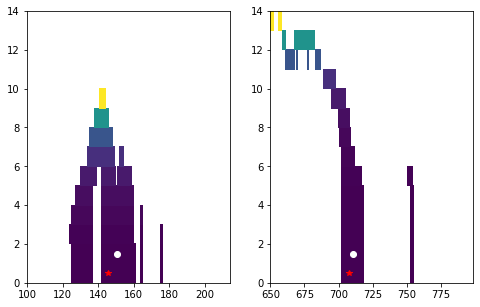

In [196]:
fig, axs = plt.subplots(1, 2, figsize=(8, 5))
axs[0].pcolormesh(np.arange(jmin, jmax), np.arange(15), mybarray[:, isent-imin, :])
axs[0].plot(jsent+0.5, 0+0.5, 'r*');
axs[1].pcolormesh(np.arange(imin, imax), np.arange(15), mybarray[:, :, jsent-jmin])
axs[1].plot(isent+0.5, 0+0.5, 'r*');
axs[0].plot(150+0.5, 1+0.5, 'wo')
axs[1].plot(710+0.5, 1+0.5, 'wo');

<ipython-input-201-43aa25d83c32>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[0].pcolormesh(np.arange(jmin, jmax), np.arange(15), mybarray[:, ey-imin, :])
<ipython-input-201-43aa25d83c32>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[1].pcolormesh(np.arange(imin, imax), np.arange(15), mybarray[:, :, ex-jmin])


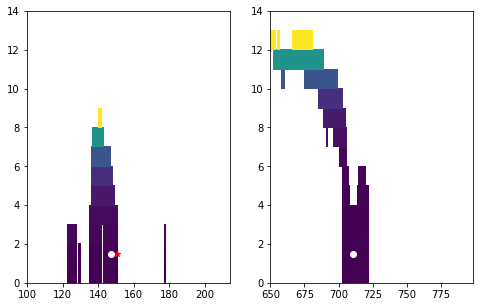

In [201]:
fig, axs = plt.subplots(1, 2, figsize=(8, 5))
ex, ey, ez = 150, 710, 1
axs[0].pcolormesh(np.arange(jmin, jmax), np.arange(15), mybarray[:, ey-imin, :])
axs[0].plot(ex+0.5, ez+0.5, 'r*');
axs[1].pcolormesh(np.arange(imin, imax), np.arange(15), mybarray[:, :, ex-jmin])
axs[1].plot(ey+0.5, ez+0.5, 'r*');
axs[0].plot(147+0.5, 1+0.5, 'wo')
axs[1].plot(710+0.5, 1+0.5, 'wo');

<ipython-input-188-576676f3b9a5>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = axs[0, 1].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.thermal)
<ipython-input-188-576676f3b9a5>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = axs[0, 2].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.haline)
<ipython-input-188-576676f3b9a5>:24: MatplotlibDeprecationWarning: shading='flat' when X an

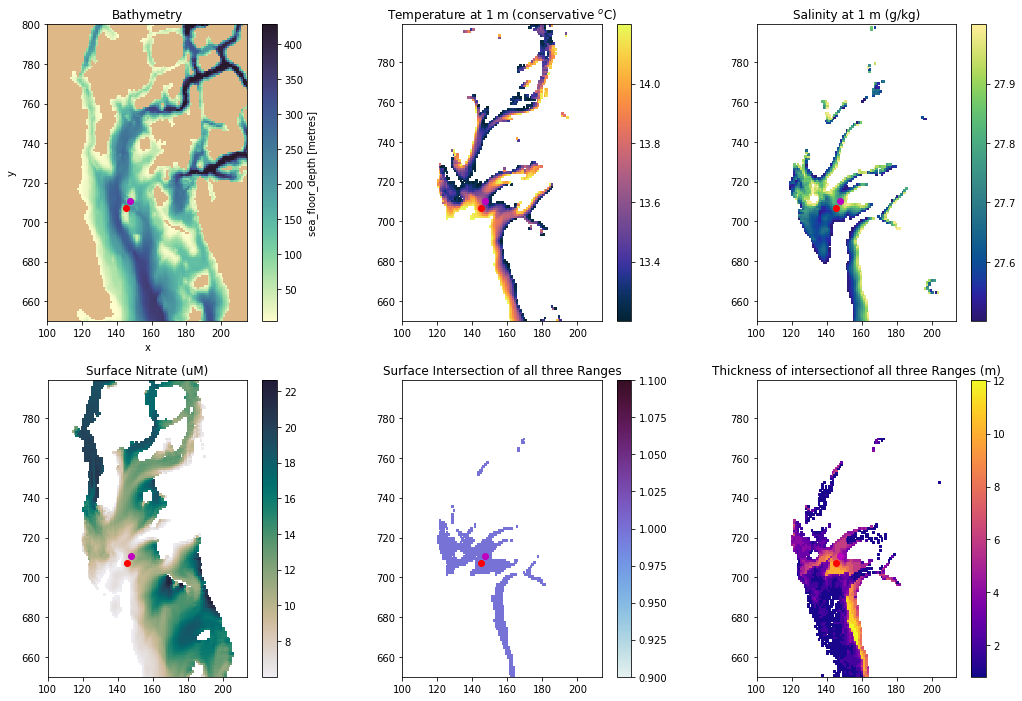

In [202]:
ex, ey = 147.5, 710.5
mybarray = dotheplots_d(30, 1, ex, ey)

<ipython-input-188-576676f3b9a5>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = axs[0, 1].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.thermal)
<ipython-input-188-576676f3b9a5>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = axs[0, 2].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.haline)
<ipython-input-188-576676f3b9a5>:24: MatplotlibDeprecationWarning: shading='flat' when X an

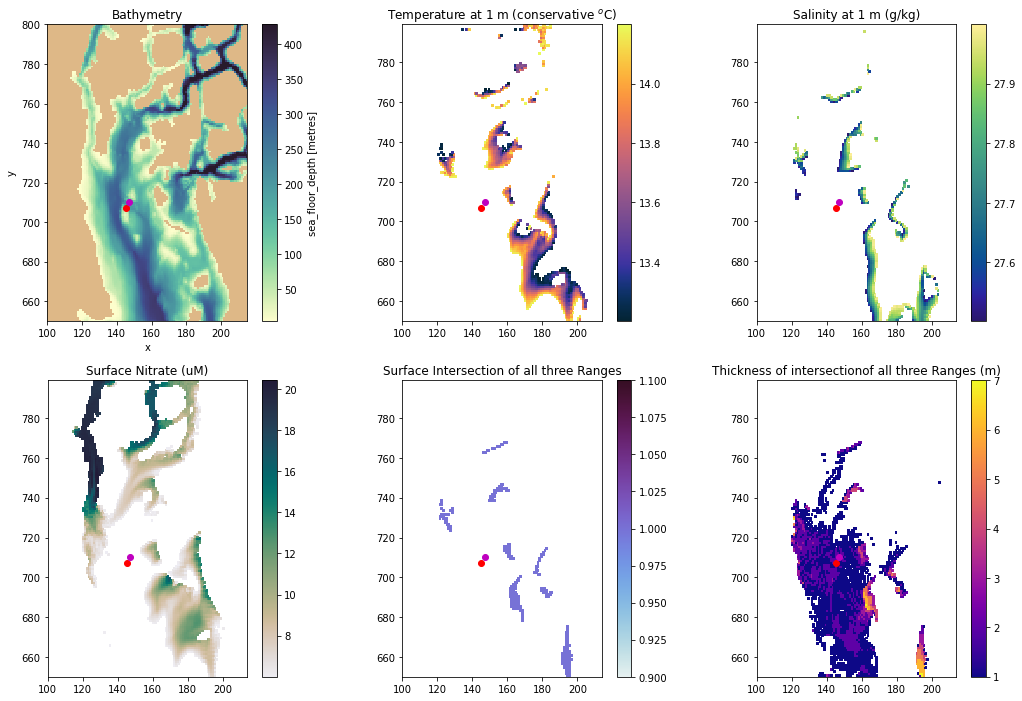

In [207]:
mybarray, myarray = dotheplots_d(29, ez, ex, ey)

<ipython-input-211-52e7596d044c>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[0].pcolormesh(np.arange(jmin, jmax), np.arange(15), mybarray[:, ey-imin, :])
<ipython-input-211-52e7596d044c>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[1].pcolormesh(np.arange(imin, imax), np.arange(15), mybarray[:, :, ex-jmin])


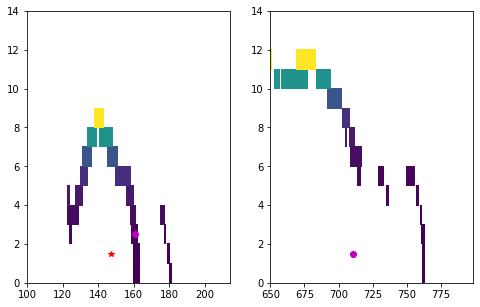

In [211]:
fig, axs = plt.subplots(1, 2, figsize=(8, 5))
ex, ey, ez = 147, 710, 1
axs[0].pcolormesh(np.arange(jmin, jmax), np.arange(15), mybarray[:, ey-imin, :])
axs[0].plot(ex+0.5, ez+0.5, 'r*');
axs[1].pcolormesh(np.arange(imin, imax), np.arange(15), mybarray[:, :, ex-jmin])
axs[1].plot(ey+0.5, ez+0.5, 'r*');
axs[0].plot(160+0.5, 2+0.5, 'mo')
axs[1].plot(710+0.5, 1+0.5, 'mo');

<ipython-input-214-72f3d1c8fd1d>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[0].pcolormesh(np.arange(jmin, jmax), np.arange(15), mybarray[:, ey-imin, :])
<ipython-input-214-72f3d1c8fd1d>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[1].pcolormesh(np.arange(imin, imax), np.arange(15), mybarray[:, :, ex-jmin])


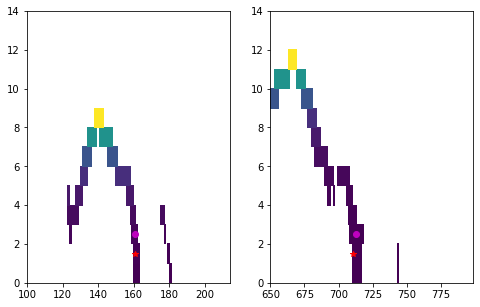

In [214]:
fig, axs = plt.subplots(1, 2, figsize=(8, 5))
ex, ey, ez = 160, 710, 1
axs[0].pcolormesh(np.arange(jmin, jmax), np.arange(15), mybarray[:, ey-imin, :])
axs[0].plot(ex+0.5, ez+0.5, 'r*');
axs[1].pcolormesh(np.arange(imin, imax), np.arange(15), mybarray[:, :, ex-jmin])
axs[1].plot(ey+0.5, ez+0.5, 'r*');
axs[0].plot(160+0.5, 2+0.5, 'mo')
axs[1].plot(712+0.5, 2+0.5, 'mo');

<ipython-input-188-576676f3b9a5>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = axs[0, 1].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.thermal)
<ipython-input-188-576676f3b9a5>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = axs[0, 2].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.haline)
<ipython-input-188-576676f3b9a5>:24: MatplotlibDeprecationWarning: shading='flat' when X an

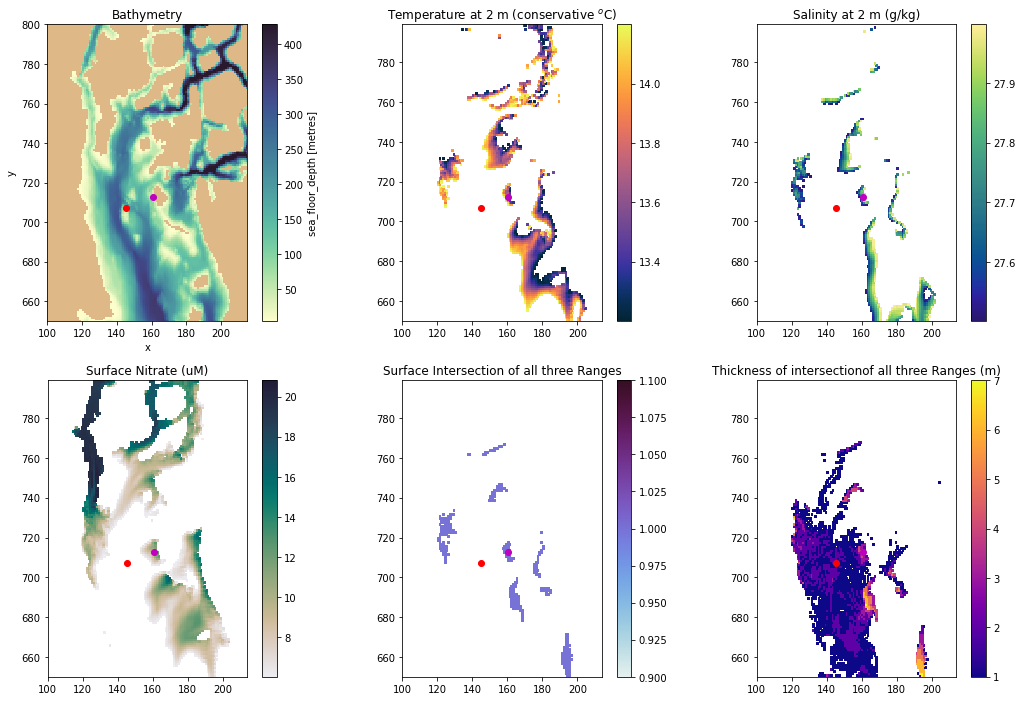

In [215]:
ex, ey = 160.5, 712.5
mybarray = dotheplots_d(29, 2, ex, ey)

<ipython-input-188-576676f3b9a5>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = axs[0, 1].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.thermal)
<ipython-input-188-576676f3b9a5>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = axs[0, 2].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.haline)
<ipython-input-188-576676f3b9a5>:24: MatplotlibDeprecationWarning: shading='flat' when X an

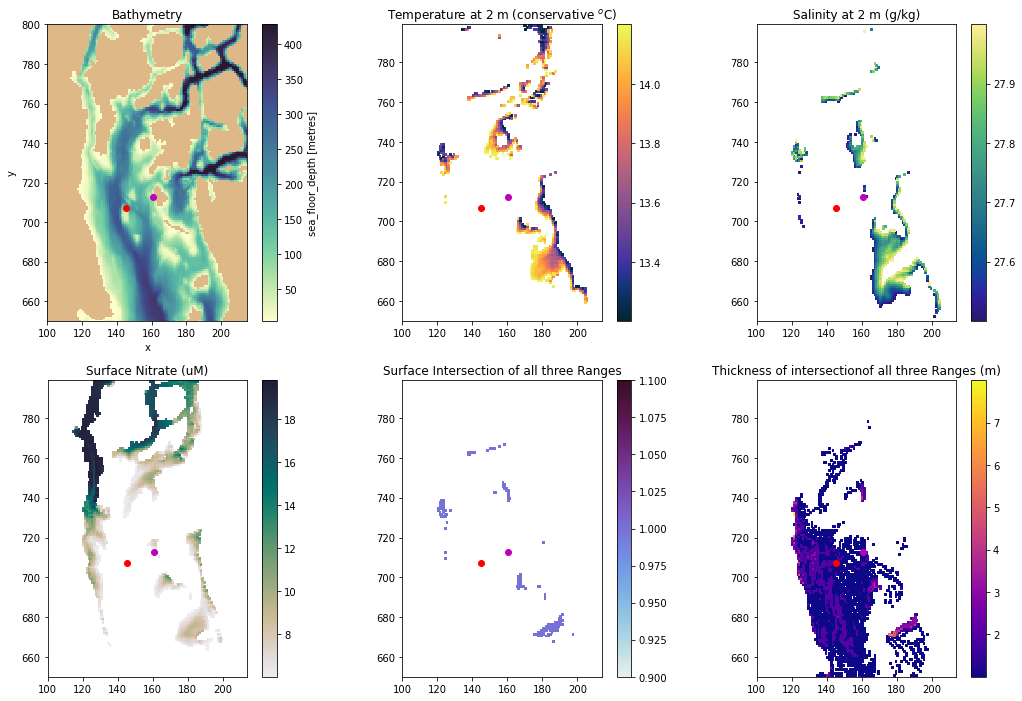

In [216]:
ex, ey = 160.5, 712.5
mybarray, myarray = dotheplots_d(28, 2, ex, ey)

<ipython-input-219-4c1e2cee724d>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[0].pcolormesh(np.arange(jmin, jmax), np.arange(15), mybarray[:, ey-imin, :])
<ipython-input-219-4c1e2cee724d>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[1].pcolormesh(np.arange(imin, imax), np.arange(15), mybarray[:, :, ex-jmin])


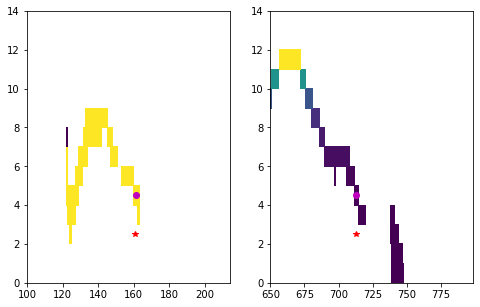

In [219]:
fig, axs = plt.subplots(1, 2, figsize=(8, 5))
ex, ey, ez = 160, 712, 2
axs[0].pcolormesh(np.arange(jmin, jmax), np.arange(15), mybarray[:, ey-imin, :])
axs[0].plot(ex+0.5, ez+0.5, 'r*');
axs[1].pcolormesh(np.arange(imin, imax), np.arange(15), mybarray[:, :, ex-jmin])
axs[1].plot(ey+0.5, ez+0.5, 'r*');
axs[0].plot(161+0.5, 4+0.5, 'mo')
axs[1].plot(712+0.5, 4+0.5, 'mo');

<ipython-input-220-b41803340a5d>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[0].pcolormesh(np.arange(jmin, jmax), np.arange(15), mybarray[:, ey-imin, :])
<ipython-input-220-b41803340a5d>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[1].pcolormesh(np.arange(imin, imax), np.arange(15), mybarray[:, :, ex-jmin])


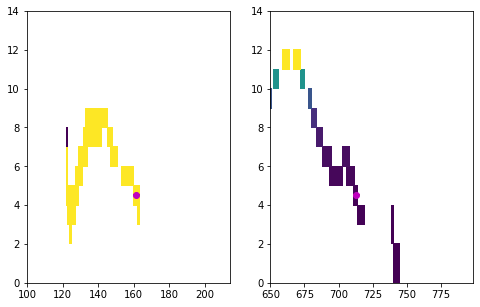

In [220]:
fig, axs = plt.subplots(1, 2, figsize=(8, 5))
ex, ey, ez = 161, 712, 4
axs[0].pcolormesh(np.arange(jmin, jmax), np.arange(15), mybarray[:, ey-imin, :])
axs[0].plot(ex+0.5, ez+0.5, 'r*');
axs[1].pcolormesh(np.arange(imin, imax), np.arange(15), mybarray[:, :, ex-jmin])
axs[1].plot(ey+0.5, ez+0.5, 'r*');
axs[0].plot(161+0.5, 4+0.5, 'mo')
axs[1].plot(712+0.5, 4+0.5, 'mo');

<ipython-input-188-576676f3b9a5>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = axs[0, 1].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.thermal)
<ipython-input-188-576676f3b9a5>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = axs[0, 2].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.haline)
<ipython-input-188-576676f3b9a5>:24: MatplotlibDeprecationWarning: shading='flat' when X an

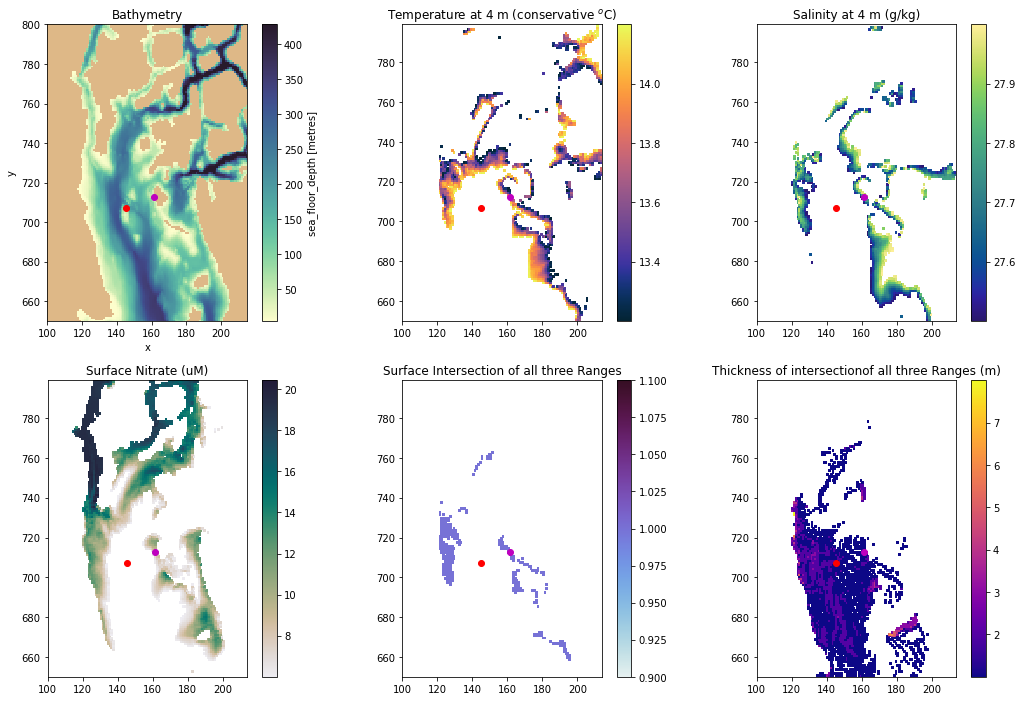

In [221]:
ex, ey = 161.5, 712.5
mybarray, myarray = dotheplots_d(28, 4, ex, ey)

<ipython-input-188-576676f3b9a5>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = axs[0, 1].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.thermal)
<ipython-input-188-576676f3b9a5>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = axs[0, 2].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.haline)
<ipython-input-188-576676f3b9a5>:24: MatplotlibDeprecationWarning: shading='flat' when X an

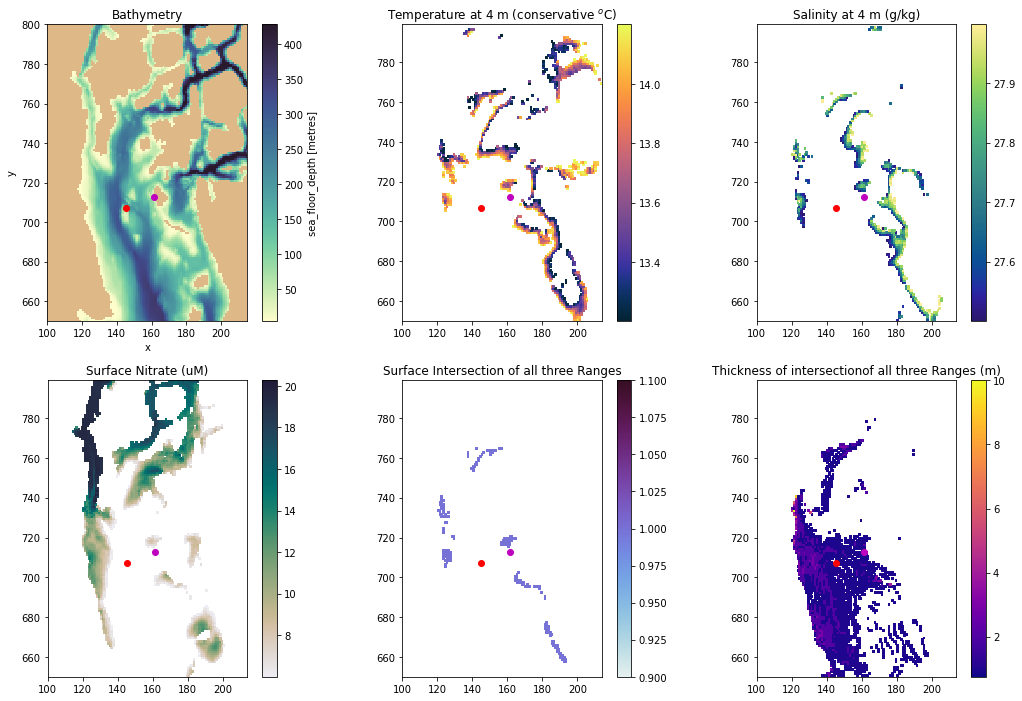

In [222]:
ex, ey = 161.5, 712.5
mybarray, myarray = dotheplots_d(27, 4, ex, ey)

<ipython-input-227-69ed01d1e621>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[0].pcolormesh(np.arange(jmin, jmax), np.arange(15), mybarray[:, ey-imin, :])
<ipython-input-227-69ed01d1e621>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[1].pcolormesh(np.arange(imin, imax), np.arange(15), mybarray[:, :, ex-jmin])


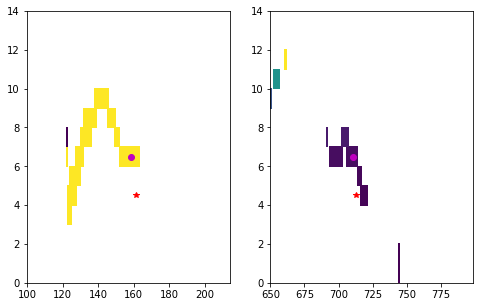

In [227]:
fig, axs = plt.subplots(1, 2, figsize=(8, 5))
ex, ey, ez = 161, 712, 4
axs[0].pcolormesh(np.arange(jmin, jmax), np.arange(15), mybarray[:, ey-imin, :])
axs[0].plot(ex+0.5, ez+0.5, 'r*');
axs[1].pcolormesh(np.arange(imin, imax), np.arange(15), mybarray[:, :, ex-jmin])
axs[1].plot(ey+0.5, ez+0.5, 'r*');
axs[0].plot(158+0.5, 6+0.5, 'mo')
axs[1].plot(710+0.5, 6+0.5, 'mo');

<ipython-input-229-95a33ceec88d>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[0].pcolormesh(np.arange(jmin, jmax), np.arange(15), mybarray[:, ey-imin, :])
<ipython-input-229-95a33ceec88d>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[1].pcolormesh(np.arange(imin, imax), np.arange(15), mybarray[:, :, ex-jmin])


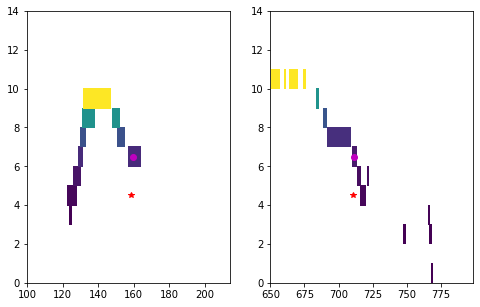

In [229]:
fig, axs = plt.subplots(1, 2, figsize=(8, 5))
ex, ey, ez = 158, 710, 4
axs[0].pcolormesh(np.arange(jmin, jmax), np.arange(15), mybarray[:, ey-imin, :])
axs[0].plot(ex+0.5, ez+0.5, 'r*');
axs[1].pcolormesh(np.arange(imin, imax), np.arange(15), mybarray[:, :, ex-jmin])
axs[1].plot(ey+0.5, ez+0.5, 'r*');
axs[0].plot(159+0.5, 6+0.5, 'mo')
axs[1].plot(711+0.5, 6+0.5, 'mo');

<ipython-input-232-19418ffb800c>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[0].pcolormesh(np.arange(jmin, jmax), np.arange(15), mybarray[:, ey-imin, :])
<ipython-input-232-19418ffb800c>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[1].pcolormesh(np.arange(imin, imax), np.arange(15), mybarray[:, :, ex-jmin])


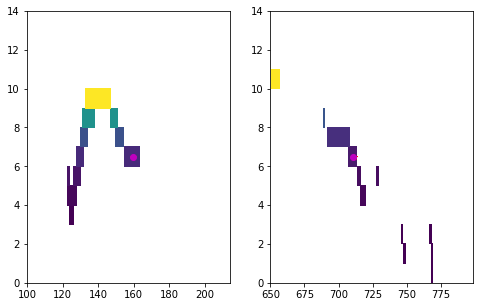

In [232]:
fig, axs = plt.subplots(1, 2, figsize=(8, 5))
ex, ey, ez = 159, 711, 6
axs[0].pcolormesh(np.arange(jmin, jmax), np.arange(15), mybarray[:, ey-imin, :])
axs[0].plot(ex+0.5, ez+0.5, 'r*');
axs[1].pcolormesh(np.arange(imin, imax), np.arange(15), mybarray[:, :, ex-jmin])
axs[1].plot(ey+0.5, ez+0.5, 'r*');
axs[0].plot(159+0.5, 6+0.5, 'mo')
axs[1].plot(710+0.5, 6+0.5, 'mo');

<ipython-input-188-576676f3b9a5>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = axs[0, 1].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.thermal)
<ipython-input-188-576676f3b9a5>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = axs[0, 2].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.haline)
<ipython-input-188-576676f3b9a5>:24: MatplotlibDeprecationWarning: shading='flat' when X an

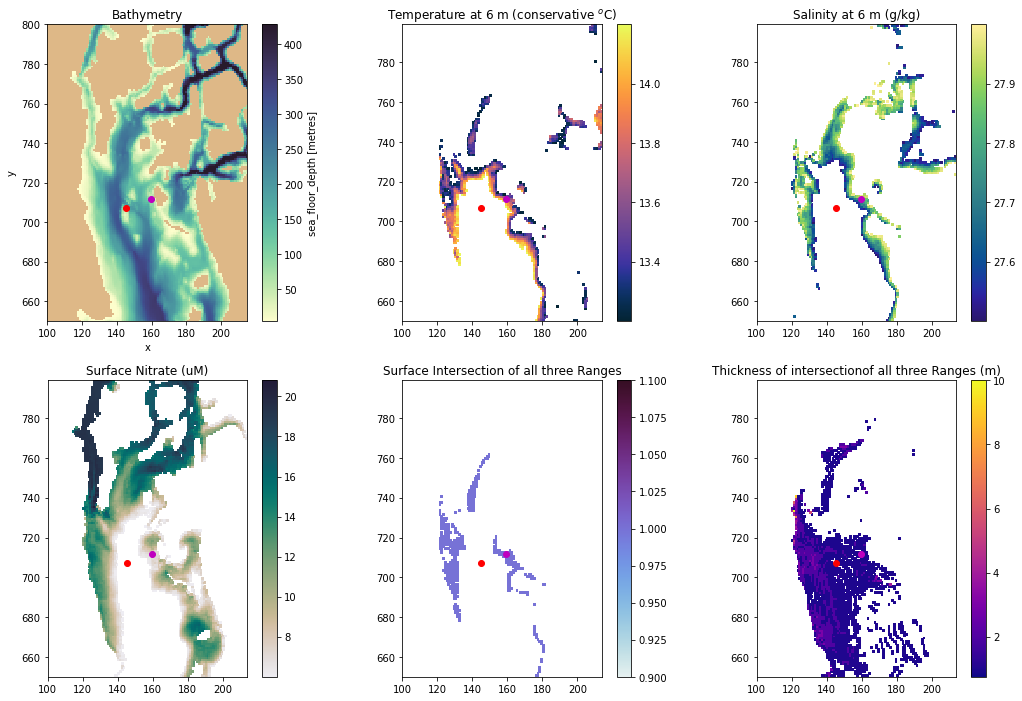

In [233]:
ex, ey = 159.5, 711.5
mybarray, myarray = dotheplots_d(27, 6, ex, ey)

<ipython-input-188-576676f3b9a5>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = axs[0, 1].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.thermal)
<ipython-input-188-576676f3b9a5>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = axs[0, 2].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.haline)
<ipython-input-188-576676f3b9a5>:24: MatplotlibDeprecationWarning: shading='flat' when X an

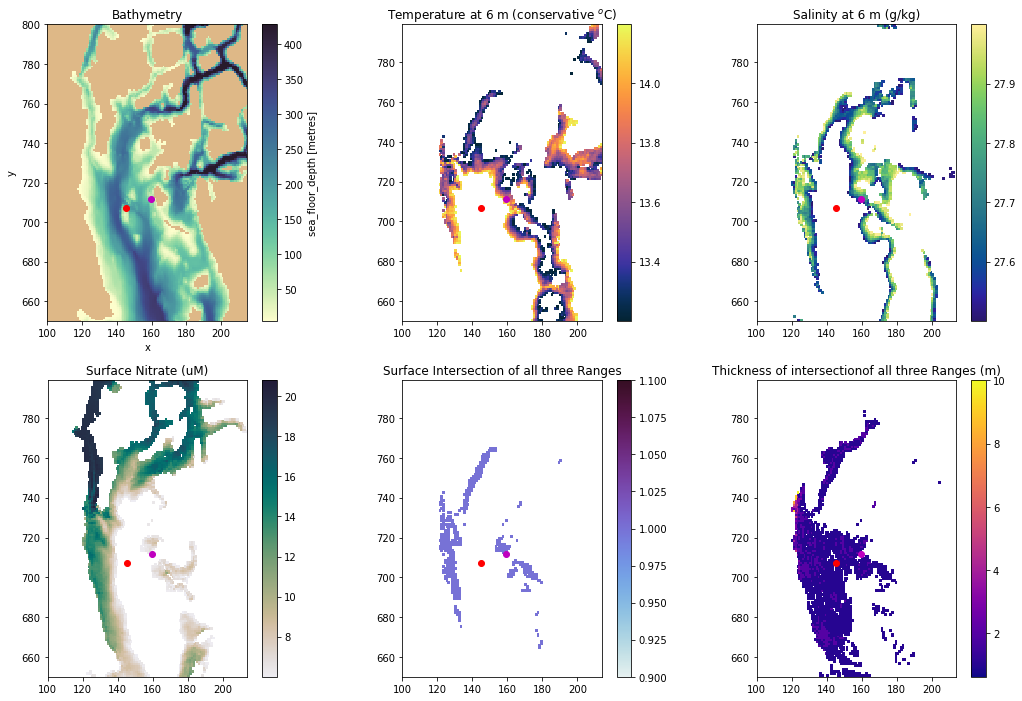

In [234]:
mybarray, myarray = dotheplots_d(26, 6, ex, ey)

<ipython-input-240-c2f4a9e652e4>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[0].pcolormesh(np.arange(jmin, jmax), np.arange(15), mybarray[:, ey-imin, :])
<ipython-input-240-c2f4a9e652e4>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[1].pcolormesh(np.arange(imin, imax), np.arange(15), mybarray[:, :, ex-jmin])


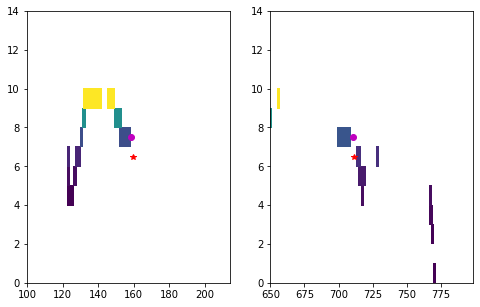

In [240]:
fig, axs = plt.subplots(1, 2, figsize=(8, 5))
ex, ey, ez = 159, 711, 6
axs[0].pcolormesh(np.arange(jmin, jmax), np.arange(15), mybarray[:, ey-imin, :])
axs[0].plot(ex+0.5, ez+0.5, 'r*');
axs[1].pcolormesh(np.arange(imin, imax), np.arange(15), mybarray[:, :, ex-jmin])
axs[1].plot(ey+0.5, ez+0.5, 'r*');
axs[0].plot(158+0.5, 7+0.5, 'mo')
axs[1].plot(710+0.5, 7+0.5, 'mo');

<ipython-input-249-2d47b66cd6d7>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[0].pcolormesh(np.arange(jmin, jmax), np.arange(15), mybarray[:, ey-imin, :])
<ipython-input-249-2d47b66cd6d7>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[1].pcolormesh(np.arange(imin, imax), np.arange(15), mybarray[:, :, ex-jmin])


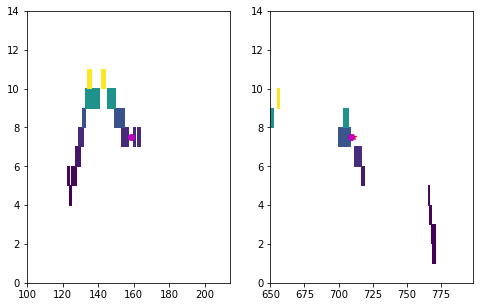

In [249]:
fig, axs = plt.subplots(1, 2, figsize=(8, 5))
ex, ey, ez = 158, 710, 7
axs[0].pcolormesh(np.arange(jmin, jmax), np.arange(15), mybarray[:, ey-imin, :])
axs[0].plot(ex+0.5, ez+0.5, 'r*');
axs[1].pcolormesh(np.arange(imin, imax), np.arange(15), mybarray[:, :, ex-jmin])
axs[1].plot(ey+0.5, ez+0.5, 'r*');
axs[0].plot(158+0.5, 7+0.5, 'mo')
axs[1].plot(709+0.5, 7+0.5, 'mo');

<ipython-input-252-fea9432e873a>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[0].pcolormesh(np.arange(jmin, jmax), np.arange(15), mybarray[:, ey-imin, :])
<ipython-input-252-fea9432e873a>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[1].pcolormesh(np.arange(imin, imax), np.arange(15), mybarray[:, :, ex-jmin])


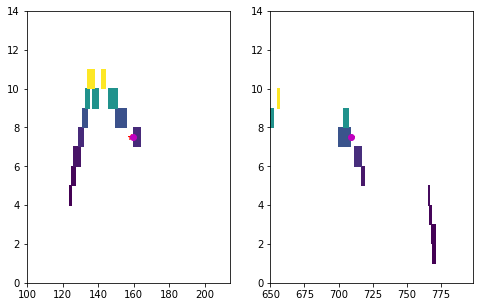

In [252]:
fig, axs = plt.subplots(1, 2, figsize=(8, 5))
ex, ey, ez = 158, 709, 7
axs[0].pcolormesh(np.arange(jmin, jmax), np.arange(15), mybarray[:, ey-imin, :])
axs[0].plot(ex+0.5, ez+0.5, 'r*');
axs[1].pcolormesh(np.arange(imin, imax), np.arange(15), mybarray[:, :, ex-jmin])
axs[1].plot(ey+0.5, ez+0.5, 'r*');
axs[0].plot(159+0.5, 7+0.5, 'mo')
axs[1].plot(709+0.5, 7+0.5, 'mo');

<ipython-input-254-bb4cd614e407>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[0].pcolormesh(np.arange(jmin, jmax), np.arange(15), mybarray[:, ey-imin, :])
<ipython-input-254-bb4cd614e407>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[1].pcolormesh(np.arange(imin, imax), np.arange(15), mybarray[:, :, ex-jmin])


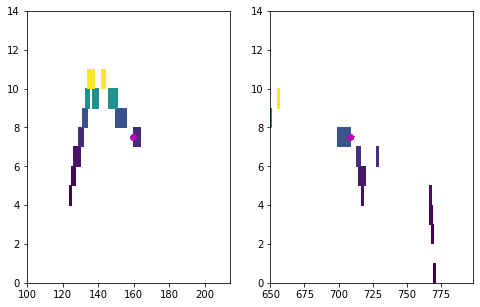

In [254]:
fig, axs = plt.subplots(1, 2, figsize=(8, 5))
ex, ey, ez = 159, 709, 7
axs[0].pcolormesh(np.arange(jmin, jmax), np.arange(15), mybarray[:, ey-imin, :])
axs[0].plot(ex+0.5, ez+0.5, 'r*');
axs[1].pcolormesh(np.arange(imin, imax), np.arange(15), mybarray[:, :, ex-jmin])
axs[1].plot(ey+0.5, ez+0.5, 'r*');
axs[0].plot(159+0.5, 7+0.5, 'mo')
axs[1].plot(708+0.5, 7+0.5, 'mo');

<ipython-input-256-54f7e75fdc75>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[0].pcolormesh(np.arange(jmin, jmax), np.arange(15), mybarray[:, ey-imin, :])
<ipython-input-256-54f7e75fdc75>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[1].pcolormesh(np.arange(imin, imax), np.arange(15), mybarray[:, :, ex-jmin])


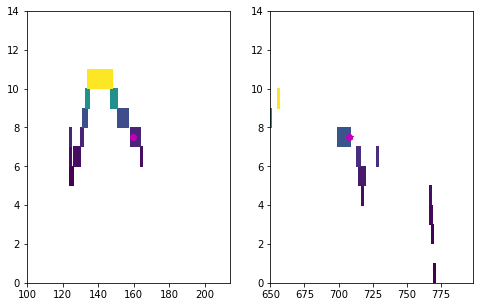

In [256]:
fig, axs = plt.subplots(1, 2, figsize=(8, 5))
ex, ey, ez = 159, 708, 7
axs[0].pcolormesh(np.arange(jmin, jmax), np.arange(15), mybarray[:, ey-imin, :])
axs[0].plot(ex+0.5, ez+0.5, 'r*');
axs[1].pcolormesh(np.arange(imin, imax), np.arange(15), mybarray[:, :, ex-jmin])
axs[1].plot(ey+0.5, ez+0.5, 'r*');
axs[0].plot(159+0.5, 7+0.5, 'mo')
axs[1].plot(707+0.5, 7+0.5, 'mo');

<ipython-input-258-37fd765ebf69>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[0].pcolormesh(np.arange(jmin, jmax), np.arange(15), mybarray[:, ey-imin, :])
<ipython-input-258-37fd765ebf69>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[1].pcolormesh(np.arange(imin, imax), np.arange(15), mybarray[:, :, ex-jmin])


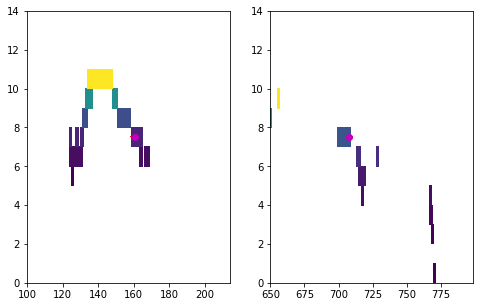

In [258]:
fig, axs = plt.subplots(1, 2, figsize=(8, 5))
ex, ey, ez = 159, 707, 7
axs[0].pcolormesh(np.arange(jmin, jmax), np.arange(15), mybarray[:, ey-imin, :])
axs[0].plot(ex+0.5, ez+0.5, 'r*');
axs[1].pcolormesh(np.arange(imin, imax), np.arange(15), mybarray[:, :, ex-jmin])
axs[1].plot(ey+0.5, ez+0.5, 'r*');
axs[0].plot(160+0.5, 7+0.5, 'mo')
axs[1].plot(707+0.5, 7+0.5, 'mo');

<ipython-input-260-51f484135f39>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[0].pcolormesh(np.arange(jmin, jmax), np.arange(15), mybarray[:, ey-imin, :])
<ipython-input-260-51f484135f39>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[1].pcolormesh(np.arange(imin, imax), np.arange(15), mybarray[:, :, ex-jmin])


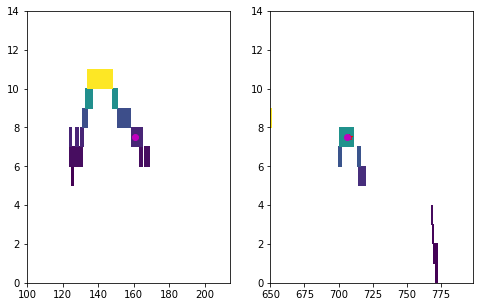

In [260]:
fig, axs = plt.subplots(1, 2, figsize=(8, 5))
ex, ey, ez = 160, 707, 7
axs[0].pcolormesh(np.arange(jmin, jmax), np.arange(15), mybarray[:, ey-imin, :])
axs[0].plot(ex+0.5, ez+0.5, 'r*');
axs[1].pcolormesh(np.arange(imin, imax), np.arange(15), mybarray[:, :, ex-jmin])
axs[1].plot(ey+0.5, ez+0.5, 'r*');
axs[0].plot(160+0.5, 7+0.5, 'mo')
axs[1].plot(706+0.5, 7+0.5, 'mo');

<ipython-input-263-bcd99270dc2e>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[0].pcolormesh(np.arange(jmin, jmax), np.arange(15), mybarray[:, ey-imin, :])
<ipython-input-263-bcd99270dc2e>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[1].pcolormesh(np.arange(imin, imax), np.arange(15), mybarray[:, :, ex-jmin])


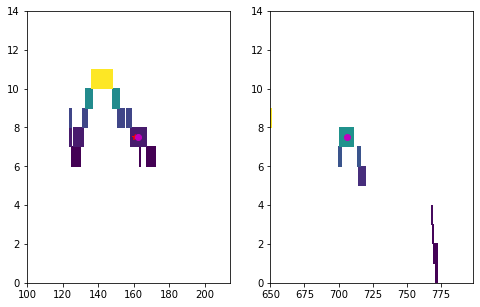

In [263]:
fig, axs = plt.subplots(1, 2, figsize=(8, 5))
ex, ey, ez = 160, 706, 7
axs[0].pcolormesh(np.arange(jmin, jmax), np.arange(15), mybarray[:, ey-imin, :])
axs[0].plot(ex+0.5, ez+0.5, 'r*');
axs[1].pcolormesh(np.arange(imin, imax), np.arange(15), mybarray[:, :, ex-jmin])
axs[1].plot(ey+0.5, ez+0.5, 'r*');
axs[0].plot(162+0.5, 7+0.5, 'mo')
axs[1].plot(706+0.5, 7+0.5, 'mo');

<ipython-input-264-cef438e5e19e>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[0].pcolormesh(np.arange(jmin, jmax), np.arange(15), mybarray[:, ey-imin, :])
<ipython-input-264-cef438e5e19e>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[1].pcolormesh(np.arange(imin, imax), np.arange(15), mybarray[:, :, ex-jmin])


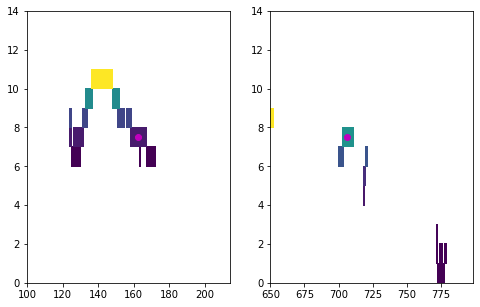

In [264]:
fig, axs = plt.subplots(1, 2, figsize=(8, 5))
ex, ey, ez = 162, 706, 7
axs[0].pcolormesh(np.arange(jmin, jmax), np.arange(15), mybarray[:, ey-imin, :])
axs[0].plot(ex+0.5, ez+0.5, 'r*');
axs[1].pcolormesh(np.arange(imin, imax), np.arange(15), mybarray[:, :, ex-jmin])
axs[1].plot(ey+0.5, ez+0.5, 'r*');
axs[0].plot(162+0.5, 7+0.5, 'mo')
axs[1].plot(706+0.5, 7+0.5, 'mo');

<ipython-input-188-576676f3b9a5>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = axs[0, 1].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.thermal)
<ipython-input-188-576676f3b9a5>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = axs[0, 2].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.haline)
<ipython-input-188-576676f3b9a5>:24: MatplotlibDeprecationWarning: shading='flat' when X an

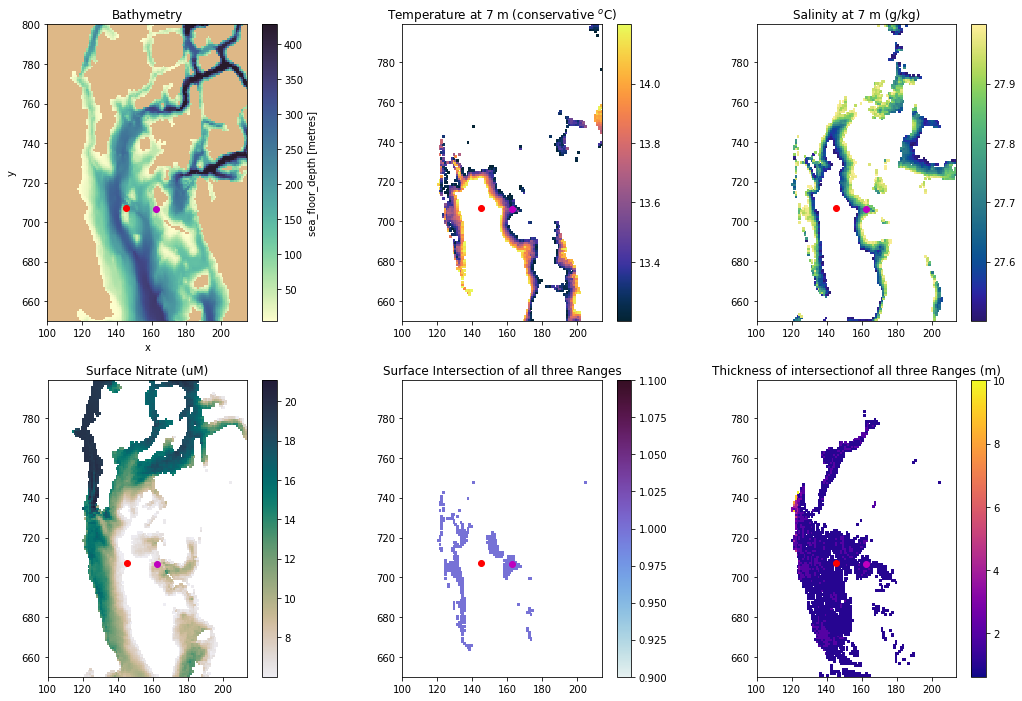

In [265]:
ex, ey, ez = 162.5, 706.5, 7
mybarray, myarray = dotheplots_d(26, 7, ex, ey)

<ipython-input-188-576676f3b9a5>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = axs[0, 1].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.thermal)
<ipython-input-188-576676f3b9a5>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = axs[0, 2].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.haline)
<ipython-input-188-576676f3b9a5>:24: MatplotlibDeprecationWarning: shading='flat' when X an

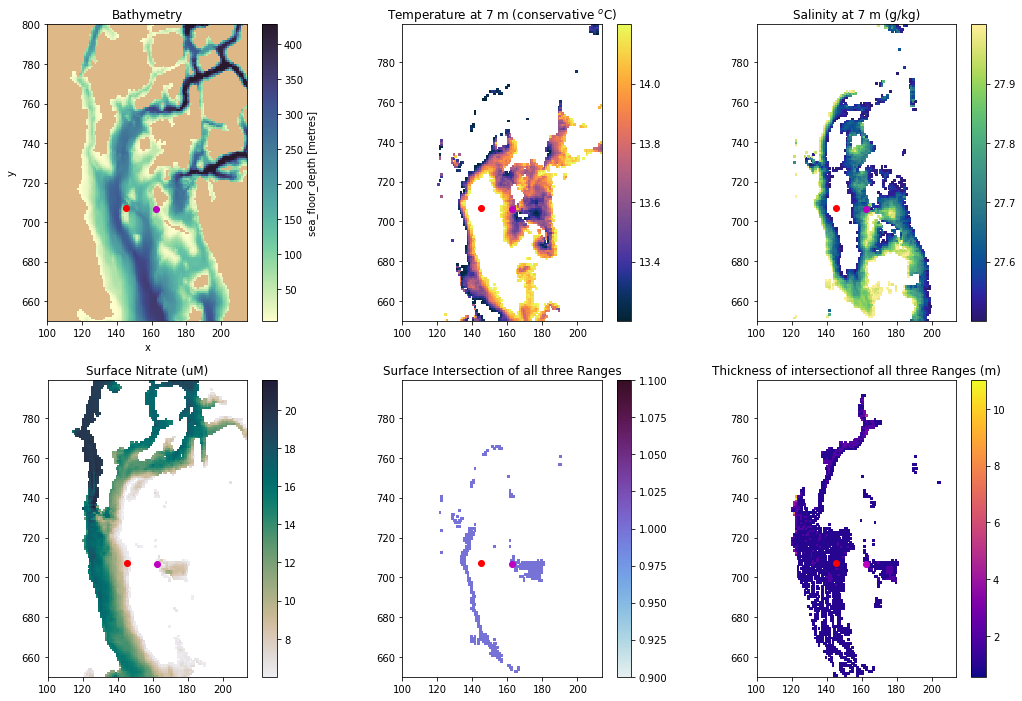

In [266]:
ex, ey, ez = 162.5, 706.5, 7
mybarray, myarray = dotheplots_d(25, 7, ex, ey)

<ipython-input-270-9298501cca3c>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[0].pcolormesh(np.arange(jmin, jmax), np.arange(15), mybarray[:, ey-imin, :])
<ipython-input-270-9298501cca3c>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[1].pcolormesh(np.arange(imin, imax), np.arange(15), mybarray[:, :, ex-jmin])


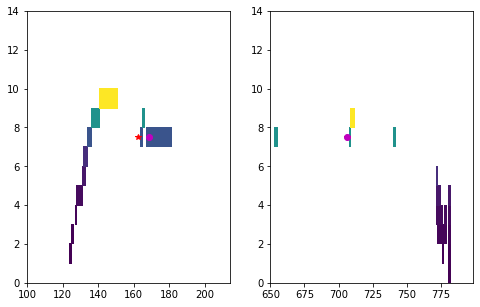

In [270]:
fig, axs = plt.subplots(1, 2, figsize=(8, 5))
ex, ey, ez = 162, 706, 7
axs[0].pcolormesh(np.arange(jmin, jmax), np.arange(15), mybarray[:, ey-imin, :])
axs[0].plot(ex+0.5, ez+0.5, 'r*');
axs[1].pcolormesh(np.arange(imin, imax), np.arange(15), mybarray[:, :, ex-jmin])
axs[1].plot(ey+0.5, ez+0.5, 'r*');
axs[0].plot(168+0.5, 7+0.5, 'mo')
axs[1].plot(706+0.5, 7+0.5, 'mo');

<ipython-input-273-571b1365f921>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[0].pcolormesh(np.arange(jmin, jmax), np.arange(15), mybarray[:, ey-imin, :])
<ipython-input-273-571b1365f921>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[1].pcolormesh(np.arange(imin, imax), np.arange(15), mybarray[:, :, ex-jmin])


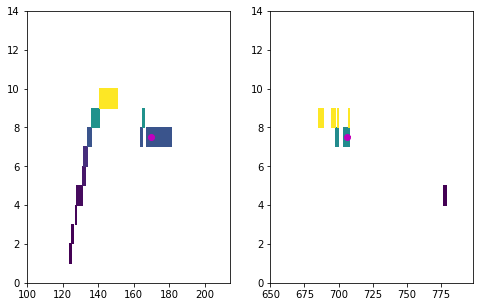

In [273]:
ig, axs = plt.subplots(1, 2, figsize=(8, 5))
ex, ey, ez = 169, 706, 7
axs[0].pcolormesh(np.arange(jmin, jmax), np.arange(15), mybarray[:, ey-imin, :])
axs[0].plot(ex+0.5, ez+0.5, 'r*');
axs[1].pcolormesh(np.arange(imin, imax), np.arange(15), mybarray[:, :, ex-jmin])
axs[1].plot(ey+0.5, ez+0.5, 'r*');
axs[0].plot(169+0.5, 7+0.5, 'mo')
axs[1].plot(706+0.5, 7+0.5, 'mo');

<ipython-input-298-b5ae19a493f0>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = axs[0, 1].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.thermal)
<ipython-input-298-b5ae19a493f0>:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = axs[0, 2].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), myarray, cmap=cm.haline)
<ipython-input-298-b5ae19a493f0>:27: MatplotlibDeprecationWarning: shading='flat' when X an

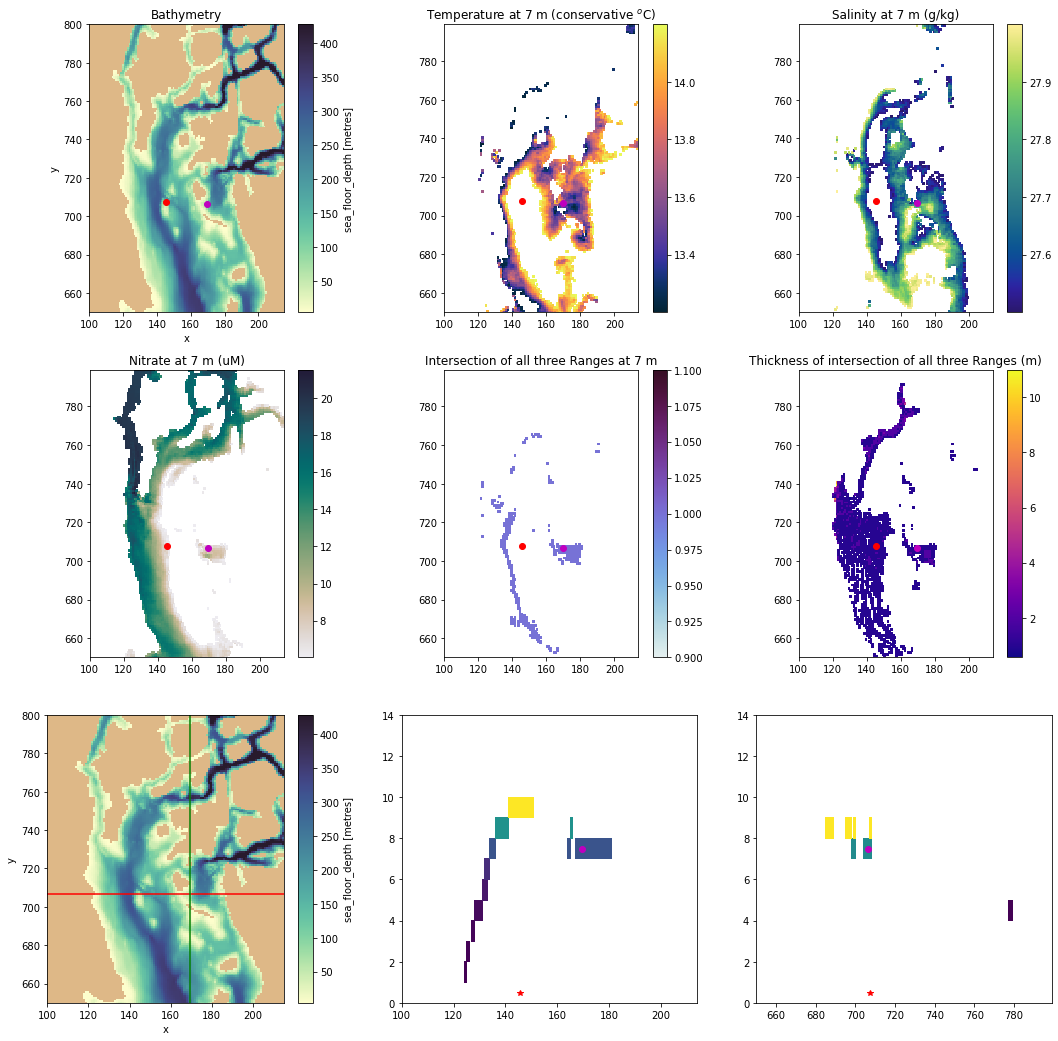

In [299]:
ex, ey, ez = 169, 706, 7
mybarray, myarray = dotheplots_d(25, ez, ex, ey)